In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from matplotlib import pyplot as plt
import missingno as mano
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime, timedelta
from sklearn import preprocessing
import pyodbc
from scipy.stats import normaltest, shapiro, chisquare, kstest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, log_loss, mean_absolute_error, mean_squared_error, r2_score

In [4]:
import import_ipynb

In [5]:
import Template as tm

importing Jupyter notebook from Template.ipynb


In [6]:
# This function to be used later
def chi_squared_test(df,x,y):
    from scipy.stats import chi2_contingency
    from scipy.stats import chi2

    data_crosstab = pd.crosstab(df[x], df[y], 
    margins = False) 
    print(data_crosstab) 

    stat, p, dof, expected = chi2_contingency(data_crosstab)
    print('dof=%d' % dof)
    print(expected)

    # interpret p-value
    alpha = 0.05
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')


In [7]:
df=tm.load_data('marketing_campaign.xlsx','excel')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

The above dataset contains 2240 rows of data, each row corresponding to a customer who have either responded/accepted campaign offer or not. Main goal of this project is to identify customers who are more likely to accept the offer and to predict who will respond to an offer for a product or service. This will help target relevant cutsomers which in return, will maximise the marketing campaign profit. 29 columns in the dataset are customer attributes which will be used to predict the target column i.e. Response.

In [8]:
tm.df_details(df)

Shape:  (2240, 29)
Column types: 
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
H/T?H


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [9]:
df=tm.remove_columns(df,['ID'])
df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0     2012-09-04       58       635         88  ...                  7   
1     2014-03-08       38        11          1  ...                  5   
2     2013-08-21       26       426         49  ...                  4   
3     2014-02-10       26        11          4  ...                  6   
4     2014-01-19       94       173         43  ...                  5   
...          ...      ...       ...        ...  ...                ...   
2235  2013-06-13       46       709         43  ...                  5   
2236  2014-06-10       56       406          0  ...                  7   
2237  2014-01-25       91       908         48  ...                  6   
2238  2014-01-24        8       428         30  ...                  3   
2239  2012-10-15       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

In [10]:
tm.to_datetime(df,['Dt_Customer'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [11]:
tm.missing_count(df)

Missing percentage  Missing sum
Year_Birth                     0.000000            0
Education                      0.000000            0
Marital_Status                 0.000000            0
Income                         1.071429           24
Kidhome                        0.000000            0
Teenhome                       0.000000            0
Dt_Customer                    0.000000            0
Recency                        0.000000            0
MntWines                       0.000000            0
MntFruits                      0.000000            0
MntMeatProducts                0.000000            0
MntFishProducts                0.000000            0
MntSweetProducts               0.000000            0
MntGoldProds                   0.000000            0
NumDealsPurchases              0.000000            0
NumWebPurchases                0.000000            0
NumCatalogPurchases            0.000000            0
NumStorePurchases              0.000000            0
NumWebVisitsMonth              0.000000            0
AcceptedCmp3                   0.000000            0
AcceptedCmp4                   0.000000            0
AcceptedCmp5                   0.000000            0
AcceptedCmp1                   0.000000            0
AcceptedCmp2                   0.000000            0
Complain                       0.000000            0
Z_CostContact                  0.000000            0
Z_Revenue                      0.000000            0
Response                       0.000000            0

There are almost no missing values in the above dataset except for only 24 rows of income column. Since our dataset already has 2240 rows, it will not be suuitable to remove these 24 rows. Let's fill the missing values based on MVA techniques.

In [12]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: in

All the unique values in each column seems reasonable except for year birth. Values of 1900, 1899 and 1893 doesn't seem reasonable for birth year.

In [13]:
df.loc[(df['Year_Birth']==1900) | (df['Year_Birth']==1899) | (df['Year_Birth']==1893) ,:]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192        1900  2n Cycle       Divorced  36640.0        1         0   
239        1893  2n Cycle         Single  60182.0        0         1   
339        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
192  2013-09-26       99        15          6  ...                  5   
239  2014-05-17       23         8          0  ...                  4   
339  2013-09-26       36       755        144  ...                  1   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
192             0             0             0             0             0   
239             0             0             0             0             0   
339             0             0             1             0             0   

     Complain  Z_CostContact  Z_Revenue  Response  
192         1              3         11         0  
239         0              3         11         0  
339         0              3         11         0  

[3 rows x 28 columns]

Let's replace these incorrect birth year values with mode of the column

In [14]:
df['Year_Birth']=df['Year_Birth'].replace(1900, np.NaN)
df['Year_Birth']=df['Year_Birth'].replace(1893, np.NaN)
df['Year_Birth']=df['Year_Birth'].replace(1899, np.NaN)

In [15]:
df.loc[df['Year_Birth'].isna() ,:]

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192         NaN  2n Cycle       Divorced  36640.0        1         0   
239         NaN  2n Cycle         Single  60182.0        0         1   
339         NaN       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
192  2013-09-26       99        15          6  ...                  5   
239  2014-05-17       23         8          0  ...                  4   
339  2013-09-26       36       755        144  ...                  1   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
192             0             0             0             0             0   
239             0             0             0             0             0   
339             0             0             1             0             0   

     Complain  Z_CostContact  Z_Revenue  Response  
192         1              3         11         0  
239         0              3         11         0  
339         0              3         11         0  

[3 rows x 28 columns]

In [16]:
df['Year_Birth'].mode()


0    1976.0
dtype: float64

In [17]:
df['Year_Birth'].loc[df['Year_Birth'].isna()]=1976

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
tm.anova_test(df)

Enter the KPI: Income
Enter the categorical column: "Education"

Anova => Income - "Education"


sum_sq      df          F        PR(>F)
C(Q("Education"))  6.707271e+10     4.0  27.739182  1.667728e-22
Residual           1.336537e+12  2211.0        NaN           NaN

P-value is quite less which means income is highly correlated with education and we can use the education column to fill in the missinng values in the income column.

In [19]:
df.loc[df['Education']=='PhD',['Education','Income']]['Income'].mean()

56145.31392931393

In [20]:
df.loc[df['Education']=='Graduation',['Education','Income']]['Income'].mean()

52720.37365591398

In [21]:
df.loc[df['Education']=='Master',['Education','Income']]['Income'].mean()

52917.53424657534

In [22]:
df.loc[df['Education']=='2n Cycle',['Education','Income']]['Income'].mean()

47633.19

In [23]:
df['Income'].loc[(df['Education']=='PhD') & (df['Income'].isna())]=56145 #average income value for PhD

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df['Income'].loc[(df['Education']=='Graduation') & (df['Income'].isna())]=52720 #average income value for Graduation

In [25]:
df['Income'].loc[(df['Education']=='Master') & (df['Income'].isna())]=52917 #average income value for Master

In [26]:
df['Income'].loc[(df['Education']=='2n Cycle') & (df['Income'].isna())]=47633 #average income value for 2n Cycle

In [27]:
tm.missing_count(df) # no more missing values 

Missing percentage  Missing sum
Year_Birth                          0.0            0
Education                           0.0            0
Marital_Status                      0.0            0
Income                              0.0            0
Kidhome                             0.0            0
Teenhome                            0.0            0
Dt_Customer                         0.0            0
Recency                             0.0            0
MntWines                            0.0            0
MntFruits                           0.0            0
MntMeatProducts                     0.0            0
MntFishProducts                     0.0            0
MntSweetProducts                    0.0            0
MntGoldProds                        0.0            0
NumDealsPurchases                   0.0            0
NumWebPurchases                     0.0            0
NumCatalogPurchases                 0.0            0
NumStorePurchases                   0.0            0
NumWebVisitsMonth                   0.0            0
AcceptedCmp3                        0.0            0
AcceptedCmp4                        0.0            0
AcceptedCmp5                        0.0            0
AcceptedCmp1                        0.0            0
AcceptedCmp2                        0.0            0
Complain                            0.0            0
Z_CostContact                       0.0            0
Z_Revenue                           0.0            0
Response                            0.0            0

In [28]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0      1957.0  Graduation         Single  58138.0        0         0   
1      1954.0  Graduation         Single  46344.0        1         1   
2      1965.0  Graduation       Together  71613.0        0         0   
3      1984.0  Graduation       Together  26646.0        1         0   
4      1981.0         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  2012-09-04       58       635         88  ...                  7   
1  2014-03-08       38        11          1  ...                  5   
2  2013-08-21       26       426         49  ...                  4   
3  2014-02-10       26        11          4  ...                  6   
4  2014-01-19       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 28 columns]

In [29]:
#df['Response'].value_counts()

count      2240.000000
mean      52253.588393
std       25039.085473
min        1730.000000
25%       35538.750000
50%       51609.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

According to skew and kurtosis test: 
Skew =  6.793602193654358
Kurtosis =  160.9908773225701
stat=  2983.605790998504
p=  0.0
Probably not Normal

According to Shapiro-Wilk test:
stat=  0.7774543166160583
p=  0.0
Probably not Normal

According to Chi-Squared normality test: 
stat=  26864261.04513017
p=  0.0
Probably not Normal

according to Kolmogorov-Smirnov test: 
stat=  1.0
p=  0.0
Probably not Normal


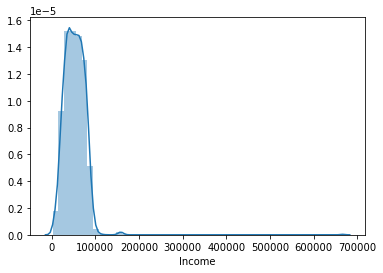

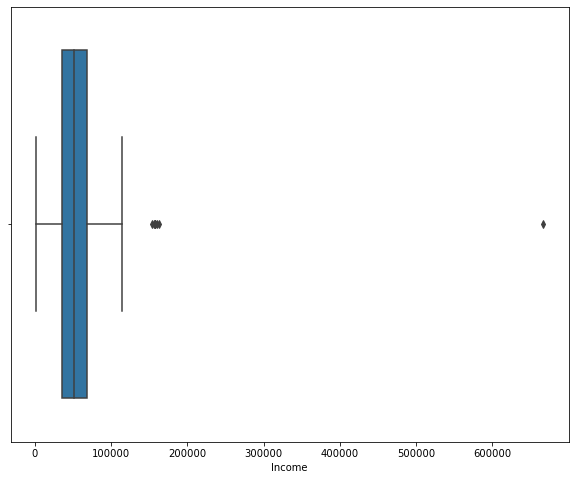

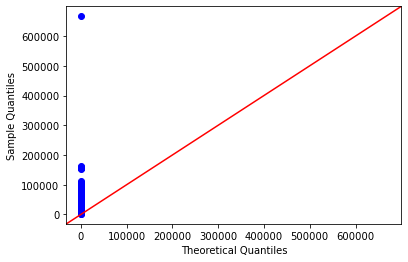

In [30]:
tm.numerical_analysis(df,'Income')

Income table seems to have one outlier case of an indiviual with salary greater than 6000000. This can be true so we will assume this outlier is genuine.


In [31]:
#df.loc[df['Response']==1,:]['Income'].mean()

0    1906
1     334
Name: Response, dtype: int64


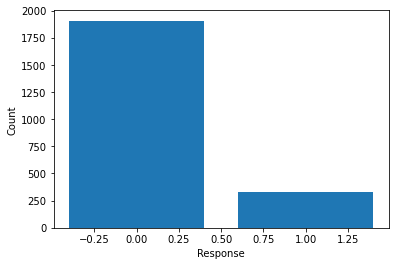

In [32]:
tm.categorical_count(df,'Response')

Fairly high class imbalance is observed. Count of people who did  not respond is far greater than those who responded.

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


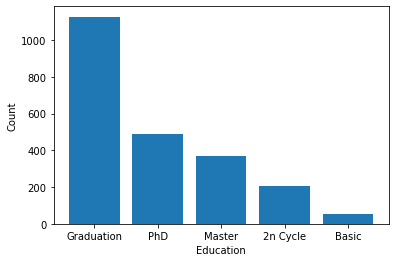

In [33]:
tm.categorical_count(df,'Education')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


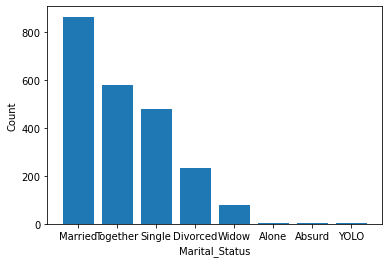

In [34]:
tm.categorical_count(df,'Marital_Status')

0    1293
1     899
2      48
Name: Kidhome, dtype: int64


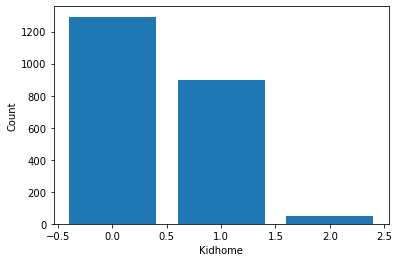

In [35]:
tm.categorical_count(df,'Kidhome')

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


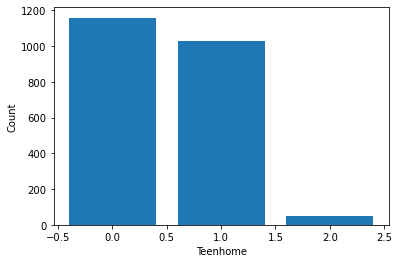

In [36]:
tm.categorical_count(df,'Teenhome')

0    2219
1      21
Name: Complain, dtype: int64


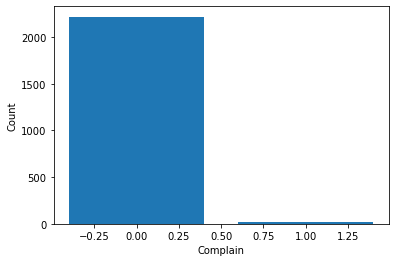

In [37]:
tm.categorical_count(df,'Complain')

In [38]:
chi_squared_test(df,'Response','Education')

Education  2n Cycle  Basic  Graduation  Master  PhD
Response                                           
0               181     52         975     313  385
1                22      2         152      57  101
dof=4
[[172.73125     45.94821429 958.95625    314.83035714 413.53392857]
 [ 30.26875      8.05178571 168.04375     55.16964286  72.46607143]]
significance=0.050, p=0.000
Dependent (reject H0)


In [39]:
chi_squared_test(df,'Response','Complain')

Complain     0   1
Response          
0         1888  18
1          331   3
dof=1
[[1888.13125   17.86875]
 [ 330.86875    3.13125]]
significance=0.050, p=0.820
Independent (fail to reject H0)


In [40]:
chi_squared_test(df,'Response','Marital_Status')

Marital_Status  Absurd  Alone  Divorced  Married  Single  Together  Widow  \
Response                                                                    
0                    1      2       184      766     374       520     58   
1                    1      1        48       98     106        60     19   

Marital_Status  YOLO  
Response              
0                  1  
1                  1  
dof=7
[[1.70178571e+00 2.55267857e+00 1.97407143e+02 7.35171429e+02
  4.08428571e+02 4.93517857e+02 6.55187500e+01 1.70178571e+00]
 [2.98214286e-01 4.47321429e-01 3.45928571e+01 1.28828571e+02
  7.15714286e+01 8.64821429e+01 1.14812500e+01 2.98214286e-01]]
significance=0.050, p=0.000
Dependent (reject H0)


In [41]:
chi_squared_test(df,'Response','Year_Birth')

Year_Birth  1940.0  1941.0  1943.0  1944.0  1945.0  1946.0  1947.0  1948.0  \
Response                                                                     
0                1       1       4       6       6      13      12      19   
1                0       0       3       1       2       3       4       2   

Year_Birth  1949.0  1950.0  ...  1987.0  1988.0  1989.0  1990.0  1991.0  \
Response                    ...                                           
0               19      26  ...      21      27      29      14      11   
1               11       3  ...       6       2       1       4       4   

Year_Birth  1992.0  1993.0  1994.0  1995.0  1996.0  
Response                                            
0               12       3       2       4       1  
1                1       2       1       1       1  

[2 rows x 56 columns]
dof=55
[[ 0.85089286  0.85089286  5.95625     5.95625     6.80714286 13.61428571
  13.61428571 17.86875    25.52678571 24.67589286 36.58839286 44.24642

Dt_Customer is the date customer got enrolled with the company. Let's see if the response is influenced by the date when customer got enrolled.

In [42]:
chi_squared_test(df,'Response','Dt_Customer')

Dt_Customer  2012-07-30  2012-07-31  2012-08-01  2012-08-02  2012-08-03  \
Response                                                                  
0                     0           1           2           3           4   
1                     1           0           2           0           1   

Dt_Customer  2012-08-04  2012-08-05  2012-08-06  2012-08-07  2012-08-08  ...  \
Response                                                                 ...   
0                     3           1           2           3           5  ...   
1                     1           0           1           1           2  ...   

Dt_Customer  2014-06-20  2014-06-21  2014-06-22  2014-06-23  2014-06-24  \
Response                                                                  
0                     2           2           5           1           2   
1                     0           0           0           1           0   

Dt_Customer  2014-06-25  2014-06-26  2014-06-27  2014-06-28  2014-06-29  
Res

In [43]:
df['Dt_Customer_year']=pd.DataFrame(tm.date_extract(df, 'Dt_Customer'))
df

Would you like to extract year(Y),month(M),day(D),week(W),hour(H),minute(min) or second(S)?: Y


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0         1957.0  Graduation         Single  58138.0        0         0   
1         1954.0  Graduation         Single  46344.0        1         1   
2         1965.0  Graduation       Together  71613.0        0         0   
3         1984.0  Graduation       Together  26646.0        1         0   
4         1981.0         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235      1967.0  Graduation        Married  61223.0        0         1   
2236      1946.0         PhD       Together  64014.0        2         1   
2237      1981.0  Graduation       Divorced  56981.0        0         0   
2238      1956.0      Master       Together  69245.0        0         1   
2239      1954.0         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp3  \
0     2012-09-04       58       635         88  ...             0   
1     2014-03-08       38        11          1  ...             0   
2     2013-08-21       26       426         49  ...             0   
3     2014-02-10       26        11          4  ...             0   
4     2014-01-19       94       173         43  ...             0   
...          ...      ...       ...        ...  ...           ...   
2235  2013-06-13       46       709         43  ...             0   
2236  2014-06-10       56       406          0  ...             0   
2237  2014-01-25       91       908         48  ...             0   
2238  2014-01-24        8       428         30  ...             0   
2239  2012-10-15       40        84          3  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Dt_Customer_year  
0                 3         11         1              2012  
1                 3         11         0              2014  
2                 3         11         0              2013  
3                 3         11         0              2014  
4                 3         11         0              2014  
...             ...        ...       ...               ...  
2235              3         11         0              2013  
2236              3         11         0              2014  
2237              3         11         0              2014  
2238              3         11         0              2014  
2239              3         11         1              2012  

[2240 rows x 29 columns]

In [44]:
df['Dt_Customer_month']=pd.DataFrame(tm.date_extract(df, 'Dt_Customer'))
df

Would you like to extract year(Y),month(M),day(D),week(W),hour(H),minute(min) or second(S)?: M


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0         1957.0  Graduation         Single  58138.0        0         0   
1         1954.0  Graduation         Single  46344.0        1         1   
2         1965.0  Graduation       Together  71613.0        0         0   
3         1984.0  Graduation       Together  26646.0        1         0   
4         1981.0         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235      1967.0  Graduation        Married  61223.0        0         1   
2236      1946.0         PhD       Together  64014.0        2         1   
2237      1981.0  Graduation       Divorced  56981.0        0         0   
2238      1956.0      Master       Together  69245.0        0         1   
2239      1954.0         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  \
0     2012-09-04       58       635         88  ...             0   
1     2014-03-08       38        11          1  ...             0   
2     2013-08-21       26       426         49  ...             0   
3     2014-02-10       26        11          4  ...             0   
4     2014-01-19       94       173         43  ...             0   
...          ...      ...       ...        ...  ...           ...   
2235  2013-06-13       46       709         43  ...             0   
2236  2014-06-10       56       406          0  ...             0   
2237  2014-01-25       91       908         48  ...             1   
2238  2014-01-24        8       428         30  ...             0   
2239  2012-10-15       40        84          3  ...             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                0             0             0         0              3   
1                0             0             0         0              3   
2                0             0             0         0              3   
3                0             0             0         0              3   
4                0             0             0         0              3   
...            ...           ...           ...       ...            ...   
2235             0             0             0         0              3   
2236             0             1             0         0              3   
2237             0             0             0         0              3   
2238             0             0             0         0              3   
2239             0             0             0         0              3   

      Z_Revenue  Response  Dt_Customer_year  Dt_Customer_month  
0            11         1              2012                  9  
1            11         0              2014                  3  
2            11         0              2013                  8  
3            11         0              2014                  2  
4            11         0              2014                  1  
...         ...       ...               ...                ...  
2235         11         0              2013                  6  
2236         11         0              2014                  6  
2237         11         0              2014                  1  
2238         11         0              2014                  1  
2239         11         1              2012                 10  

[2240 rows x 30 columns]

In [45]:
chi_squared_test(df,'Response','Dt_Customer_year')

Dt_Customer_year  2012  2013  2014
Response                          
0                  362  1035   509
1                  132   154    48
dof=2
[[ 420.34107143 1011.71160714  473.94732143]
 [  73.65892857  177.28839286   83.05267857]]
significance=0.050, p=0.000
Dependent (reject H0)


In [46]:
chi_squared_test(df,'Response','Dt_Customer_month')

Dt_Customer_month   1    2    3    4    5    6   7    8    9    10   11   12
Response                                                                    
0                  167  150  185  160  192  150  90  176  152  173  154  157
1                   30   28   26   22   24   16  11   46   41   39   33   18
dof=11
[[167.62589286 151.45892857 179.53839286 154.8625     183.79285714
  141.24821429  85.94017857 188.89821429 164.22232143 180.38928571
  159.11696429 148.90625   ]
 [ 29.37410714  26.54107143  31.46160714  27.1375      32.20714286
   24.75178571  15.05982143  33.10178571  28.77767857  31.61071429
   27.88303571  26.09375   ]]
significance=0.050, p=0.003
Dependent (reject H0)


Both year and month of the joininig date is dependent on the target column so we can remove the individual columns of year and month and keep the original Dt_Customer column as it is.

In [47]:
df= tm.remove_columns(df,['Dt_Customer_year','Dt_Customer_month'])
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0      1957.0  Graduation         Single  58138.0        0         0   
1      1954.0  Graduation         Single  46344.0        1         1   
2      1965.0  Graduation       Together  71613.0        0         0   
3      1984.0  Graduation       Together  26646.0        1         0   
4      1981.0         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  2012-09-04       58       635         88  ...                  7   
1  2014-03-08       38        11          1  ...                  5   
2  2013-08-21       26       426         49  ...                  4   
3  2014-02-10       26        11          4  ...                  6   
4  2014-01-19       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 28 columns]

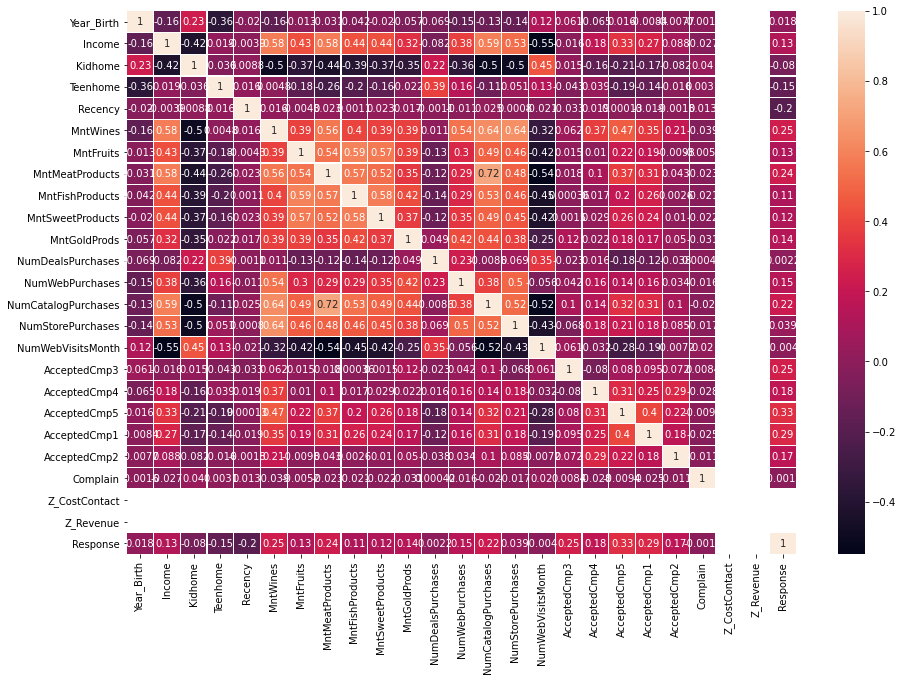

In [48]:
tm.corr_heatmap(df)

In [49]:
df1=df.copy(deep=True)

In [50]:
df1['Dt_Customer']=tm.to_str(df,['Dt_Customer'])

In [51]:
df1['Dt_Customer']=df1['Dt_Customer'].str[0:7]

In [52]:
df1

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0         1957.0  Graduation         Single  58138.0        0         0   
1         1954.0  Graduation         Single  46344.0        1         1   
2         1965.0  Graduation       Together  71613.0        0         0   
3         1984.0  Graduation       Together  26646.0        1         0   
4         1981.0         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235      1967.0  Graduation        Married  61223.0        0         1   
2236      1946.0         PhD       Together  64014.0        2         1   
2237      1981.0  Graduation       Divorced  56981.0        0         0   
2238      1956.0      Master       Together  69245.0        0         1   
2239      1954.0         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0        2012-09       58       635         88  ...                  7   
1        2014-03       38        11          1  ...                  5   
2        2013-08       26       426         49  ...                  4   
3        2014-02       26        11          4  ...                  6   
4        2014-01       94       173         43  ...                  5   
...          ...      ...       ...        ...  ...                ...   
2235     2013-06       46       709         43  ...                  5   
2236     2014-06       56       406          0  ...                  7   
2237     2014-01       91       908         48  ...                  6   
2238     2014-01        8       428         30  ...                  3   
2239     2012-10       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

Encoding the categorical columns

In [53]:
df1=tm.encode(df1,'Dt_Customer','label')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
df1=tm.encode(df1,'Marital_Status','label')

In [55]:
df1['Education'].loc[df1['Education']=='Basic']=0
df1['Education'].loc[df1['Education']=='2n Cycle']=1
df1['Education'].loc[df1['Education']=='Graduation']=2
df1['Education'].loc[df1['Education']=='Master']=3
df1['Education'].loc[df1['Education']=='PhD']=4

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
df1

Year_Birth Education  Marital_Status   Income  Kidhome  Teenhome  \
0         1957.0         2               4  58138.0        0         0   
1         1954.0         2               4  46344.0        1         1   
2         1965.0         2               5  71613.0        0         0   
3         1984.0         2               5  26646.0        1         0   
4         1981.0         4               3  58293.0        1         0   
...          ...       ...             ...      ...      ...       ...   
2235      1967.0         2               3  61223.0        0         1   
2236      1946.0         4               5  64014.0        2         1   
2237      1981.0         2               2  56981.0        0         0   
2238      1956.0         3               5  69245.0        0         1   
2239      1954.0         4               3  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0               2       58       635         88  ...                  7   
1              20       38        11          1  ...                  5   
2              13       26       426         49  ...                  4   
3              19       26        11          4  ...                  6   
4              18       94       173         43  ...                  5   
...           ...      ...       ...        ...  ...                ...   
2235           11       46       709         43  ...                  5   
2236           23       56       406          0  ...                  7   
2237           18       91       908         48  ...                  6   
2238           18        8       428         30  ...                  3   
2239            3       40        84          3  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 28 columns]

In [57]:
df1.astype({'Education': 'int32'}).dtypes

Year_Birth             float64
Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int32
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Now that all the columns are in numerical format, we can move towards predictive analytics

# Machine Learning

What do you want your test size to be? 0.2


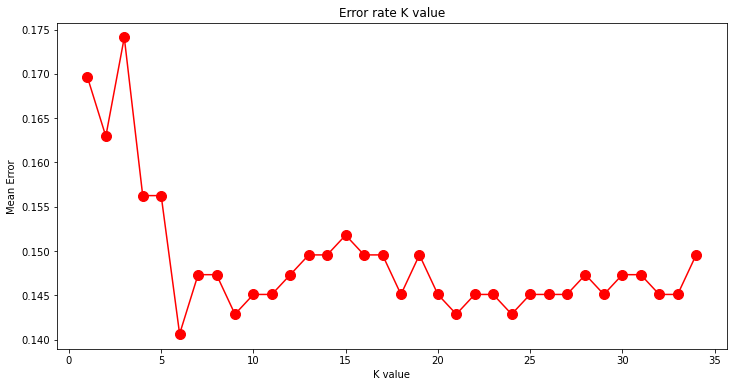

In [56]:
tm.error_rate_plot(df1, 'Response')

Lowest error rate is observed at value just above 5. Let's check the accuracy on 6 and 7 neighbors.

In [57]:
k=6
oversample = True
classification = True
P=df1.drop(['Response'],axis=1)
L=df1['Response']
scaler=StandardScaler()
for i in P.columns:
    P[i]=scaler.fit_transform(P[[i]])
    
ts=float(input('What do you want your test size to be? ')) #0.2
x_train, x_test, y_train, y_test = train_test_split(P,L,test_size=ts,random_state=42)
if oversample==True:
    from imblearn.over_sampling import RandomOverSampler
    sample = RandomOverSampler(sampling_strategy=0.5)
    x_train, y_train=sample.fit_resample(x_train,y_train)
error=[]
if classification==True:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
y_pred

What do you want your test size to be? 0.2


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [58]:
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred)*100
recall=recall_score(y_test,y_pred)*100
f1score=f1_score(y_test,y_pred)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  79.91071428571429
Precision =  35.61643835616438
Recall =  37.68115942028986
F1 score =  36.61971830985915


In [59]:
k=7
oversample = True
classification = True
P=df1.drop(['Response'],axis=1)
L=df1['Response']
scaler=StandardScaler()
for i in P.columns:
    P[i]=scaler.fit_transform(P[[i]])
    
ts=float(input('What do you want your test size to be? ')) #0.2
x_train, x_test, y_train, y_test = train_test_split(P,L,test_size=ts,random_state=42)
if oversample==True:
    from imblearn.over_sampling import RandomOverSampler
    sample = RandomOverSampler(sampling_strategy=0.5)
    x_train, y_train=sample.fit_resample(x_train,y_train)
if classification==True:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict(x_test)
y_pred

What do you want your test size to be? 0.2


array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [60]:
accuracy=accuracy_score(y_test,y_pred)*100
precision=precision_score(y_test,y_pred)*100
recall=recall_score(y_test,y_pred)*100
f1score=f1_score(y_test,y_pred)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  78.34821428571429
Precision =  34.090909090909086
Recall =  43.47826086956522
F1 score =  38.216560509554135


Using 7 neighbors give a better accuracy score. Let's try other ML algorithms 

Do you want to oversample your training data? (0/1): 1
What do you want your test size to be? 0.2
Logistic Regression


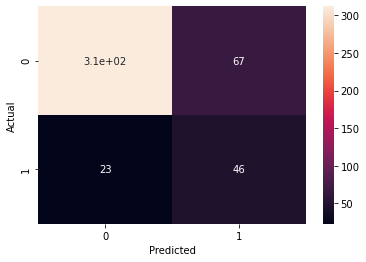

Decision Tree


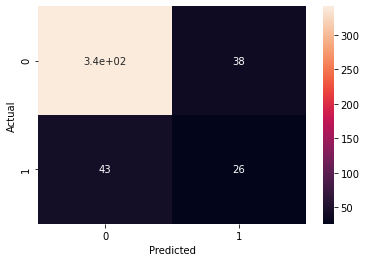

Neighbors for knn: 3
KNN


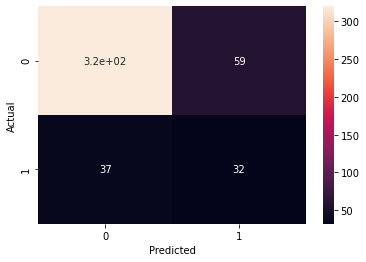

Naive Bayes


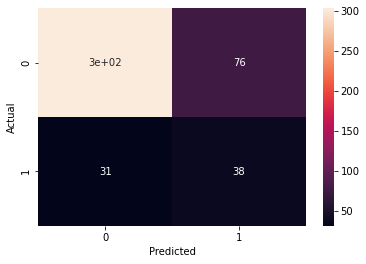

Random Forest


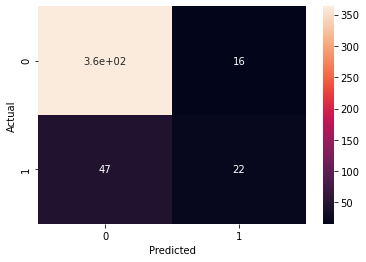

Gradient Boosting


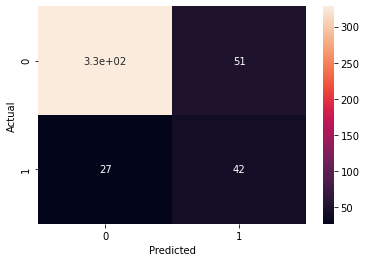

Ada Boost


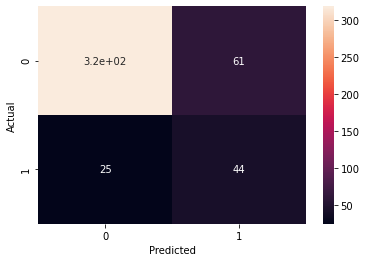

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


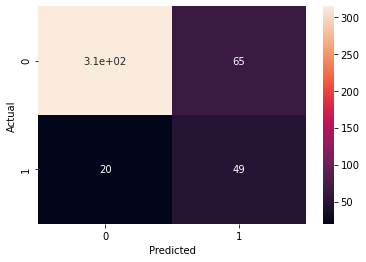

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:01:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


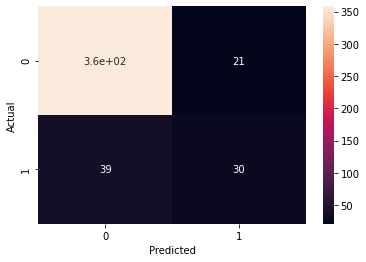

Light GBM


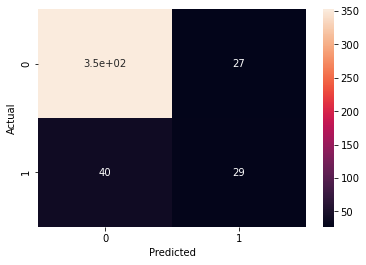

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  79.910714  40.707965  66.666667  50.549451   
1          Decision Tree  81.919643  40.625000  37.681159  39.097744   
2                    KNN  78.571429  35.164835  46.376812  40.000000   
3            Naive Bayes  76.116071  33.333333  55.072464  41.530055   
4          Random Forest  85.937500  57.894737  31.884058  41.121495   
5      Gradient Boosting  82.589286  45.161290  60.869565  51.851852   
6              Ada Boost  80.803571  41.904762  63.768116  50.574713   
7  Multilayer Perceptron  81.026786  42.982456  71.014493  53.551913   
8               XG Boost  86.607143  58.823529  43.478261  50.000000   
9              Light GBM  85.044643  51.785714  42.028986  46.400000   

   Logistic loss  
0       6.938713  
1       6.244802  
2       7.401272  
3       8.249352  
4       4.857044  
5       6.013539  
6       6.630320  
7       6.553232  
8       4.625766  
9       5.165446 

In [61]:
tm.ml(df1,'Response')

Logistic regression is providing one of the best performances so let's tune the parameters for logistic regression.

In [62]:
# Logistic Regression with varying thresholds
oversample=True
P=df1.drop(['Response'],axis=1)
L=df1['Response']
scaler=StandardScaler()
for i in P.columns:
    P[i]=scaler.fit_transform(P[[i]])
    
ts=float(input('What do you want your test size to be? ')) #0.2
x_train, x_test, y_train, y_test = train_test_split(P,L,test_size=ts,random_state=42)
if oversample==True:
    from imblearn.over_sampling import RandomOverSampler
    sample = RandomOverSampler(sampling_strategy=0.5)
    x_train, y_train=sample.fit_resample(x_train,y_train)
if classification==True:
    classifier=LogisticRegression()
    classifier.fit(x_train, y_train)
    y_pred=classifier.predict_proba(x_test)
y_pred=y_pred[:,1]
y_pred

What do you want your test size to be? 0.2


array([0.07153848, 0.24193804, 0.06297571, 0.70370881, 0.1333978 ,
       0.07479139, 0.00879506, 0.00522653, 0.06495014, 0.00829945,
       0.20077197, 0.38759832, 0.19720715, 0.98040026, 0.02963138,
       0.02701328, 0.16620149, 0.70571296, 0.16732092, 0.00721938,
       0.43499945, 0.47548917, 0.06061422, 0.96172142, 0.14910958,
       0.38955826, 0.04017518, 0.85311656, 0.37569628, 0.02150646,
       0.06194805, 0.15340992, 0.2507907 , 0.07252417, 0.90497182,
       0.10172361, 0.98875807, 0.05616314, 0.01434714, 0.10323855,
       0.05413979, 0.08663029, 0.06045256, 0.26819058, 0.04201684,
       0.45254802, 0.75491522, 0.03807717, 0.50552101, 0.28806174,
       0.00325884, 0.61380166, 0.89010154, 0.07635916, 0.0500209 ,
       0.43664873, 0.06967111, 0.26222471, 0.02572158, 0.26541586,
       0.28577235, 0.05736958, 0.02939208, 0.79831032, 0.01188943,
       0.85910203, 0.36453189, 0.08820747, 0.06056636, 0.01000218,
       0.07332893, 0.08259578, 0.32061847, 0.00883131, 0.00339

In [63]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

In [64]:
def tp_fp(y_pred, th):
    y_pred1=[]
    #y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), dtype='category')
    y_pred=list(y_pred)
    for i in range(len(y_pred)):
        if y_pred[i]>=th:
            y_pred1.append(1)
        else:
            y_pred1.append(0)
    tn,fp,fn,tp=confusion_matrix(y_test, y_pred1).ravel()
    return tp,fp

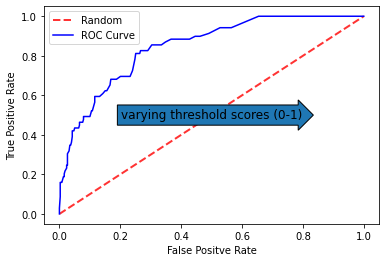

In [65]:
tpr=[]
fpr=[]

positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)

for t in thresholds:
    tp, fp=tp_fp(y_pred,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [66]:
# Checking AUC score

auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.8459714733662193

In [67]:
tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

array([0.        , 0.38094453, 0.4707822 , 0.55561419, 0.58791703,
       0.61577791, 0.64040468, 0.66702029, 0.68187502, 0.69545139,
       0.7056045 , 0.71146024, 0.72445602, 0.73405188, 0.74821496,
       0.75280059, 0.75401872, 0.75997943, 0.76736522, 0.77176276,
       0.76571899, 0.77280257, 0.77842303, 0.772951  , 0.77984633,
       0.76714094, 0.74205671, 0.7308411 , 0.73334828, 0.74575776,
       0.74401234, 0.75002709, 0.75241952, 0.73740427, 0.7314687 ,
       0.72537915, 0.72764243, 0.72247392, 0.71820054, 0.72038021,
       0.72146758, 0.72255331, 0.72471989, 0.70682281, 0.6987427 ,
       0.68212733, 0.68212733, 0.68212733, 0.68313565, 0.66584401,
       0.66973787, 0.67264347, 0.67360922, 0.66362927, 0.66362927,
       0.6544325 , 0.65629965, 0.65723123, 0.65723123, 0.65816149,
       0.6477961 , 0.63816158, 0.64085236, 0.64085236, 0.64263996,
       0.63271546, 0.63446572, 0.61219678, 0.61219678, 0.61219678,
       0.58989749, 0.57877252, 0.57877252, 0.57956482, 0.55564

In [68]:
# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
print('At index:',index)
print('geometric mean is: ',gmean[index])

At index: 24
geometric mean is:  0.7798463308866247


In [69]:
# optimal threshold
thresholds[index] # threshold of 0.2 will give us the highest mean and best tpr to fpr ratio

0.24242424242424243

In [70]:
y_pred=list(y_pred)
y_pred1=[]
for i in range(len(y_pred)):
    if y_pred[i]>=0.2:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [71]:
accuracy=accuracy_score(y_test,y_pred1)*100
precision=precision_score(y_test,y_pred1)*100
recall=recall_score(y_test,y_pred1)*100
f1score=f1_score(y_test,y_pred1)*100
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 score = ', f1score)

Accuracy =  72.32142857142857
Precision =  33.72781065088758
Recall =  82.6086956521739
F1 score =  47.89915966386555


Recall is best at threshold of 0.2. Other performance metrics are still compromised. This experiment proves that applying optimal threshold on machine learning predictions using ROC and AUC only improves the recall. Other important metrics such as F1 score decreases slightly.

Let's try running these algorithms for fewer relevant features using random forest feature selector.

In [72]:
tm.RFFS(df1,3,'Response')

Recency                9.460018
Income                 8.483781
Dt_Customer            7.616305
AcceptedCmp3           7.614379
AcceptedCmp5           5.669126
AcceptedCmp1           5.530830
NumCatalogPurchases    5.015855
MntWines               4.809043
MntMeatProducts        4.791793
MntFruits              4.606211
MntGoldProds           4.463848
MntFishProducts        4.256397
Marital_Status         4.107156
Year_Birth             3.993558
NumWebVisitsMonth      3.813030
NumWebPurchases        3.214453
MntSweetProducts       2.982208
NumDealsPurchases      2.622193
NumStorePurchases      2.530395
Education              1.600668
AcceptedCmp4           1.197435
Teenhome               1.096693
Kidhome                0.395190
AcceptedCmp2           0.129436
Z_CostContact          0.000000
Complain               0.000000
Z_Revenue              0.000000
dtype: float64


Recency                9.460018
Income                 8.483781
Dt_Customer            7.616305
AcceptedCmp3           7.614379
AcceptedCmp5           5.669126
AcceptedCmp1           5.530830
NumCatalogPurchases    5.015855
MntWines               4.809043
MntMeatProducts        4.791793
MntFruits              4.606211
MntGoldProds           4.463848
MntFishProducts        4.256397
Marital_Status         4.107156
Year_Birth             3.993558
NumWebVisitsMonth      3.813030
NumWebPurchases        3.214453
MntSweetProducts       2.982208
NumDealsPurchases      2.622193
NumStorePurchases      2.530395
Education              1.600668
AcceptedCmp4           1.197435
Teenhome               1.096693
Kidhome                0.395190
AcceptedCmp2           0.129436
Z_CostContact          0.000000
Complain               0.000000
Z_Revenue              0.000000
dtype: float64

for tree =  3 and threshold =  1
AcceptedCmp5           11.831451
Recency                 9.104062
Dt_Customer             7.825947
Income                  6.992044
MntMeatProducts         6.211519
MntGoldProds            5.149121
MntFishProducts         5.003896
MntWines                4.922315
NumWebVisitsMonth       4.868101
Year_Birth              4.642049
NumCatalogPurchases     4.303568
MntFruits               3.644799
MntSweetProducts        3.630682
NumStorePurchases       3.406824
NumWebPurchases         3.247269
Education               2.965475
NumDealsPurchases       2.622053
AcceptedCmp1            2.448100
AcceptedCmp3            2.294514
Teenhome                2.086775
Marital_Status          1.449285
Kidhome                 0.716825
AcceptedCmp4            0.509361
AcceptedCmp2            0.123966
Complain                0.000000
Z_CostContact           0.000000
Z_Revenue               0.000000
dtype: float64
Do you want to oversample your training data? (0/1): 1
What d

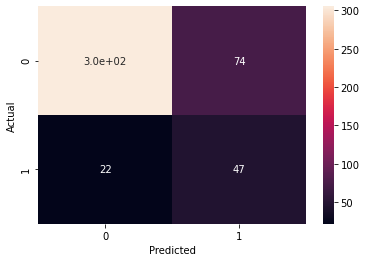

Decision Tree


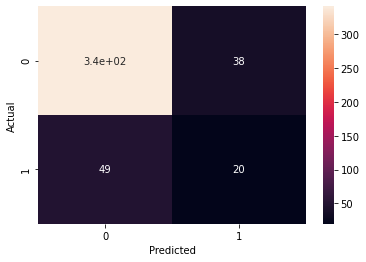

Neighbors for knn: 3
KNN


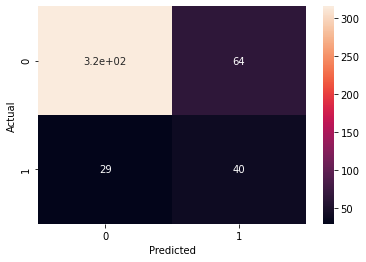

Naive Bayes


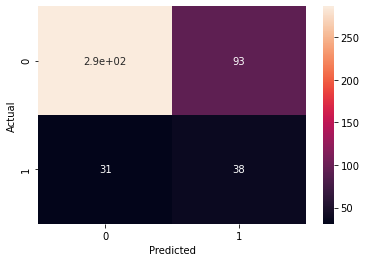

Random Forest


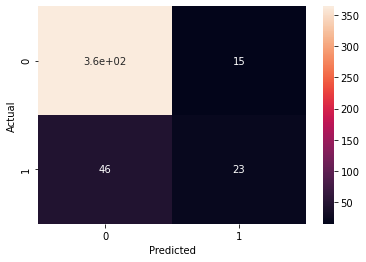

Gradient Boosting


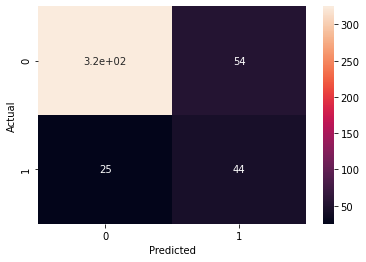

Ada Boost


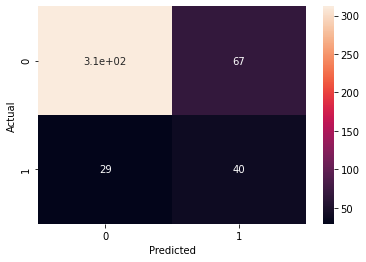

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


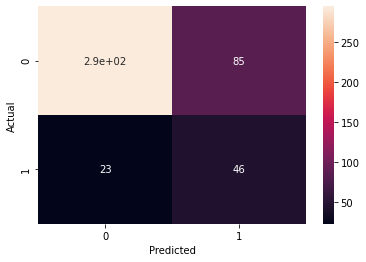

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:01:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


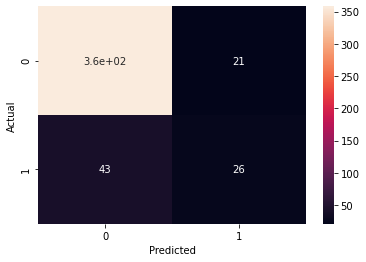

Light GBM


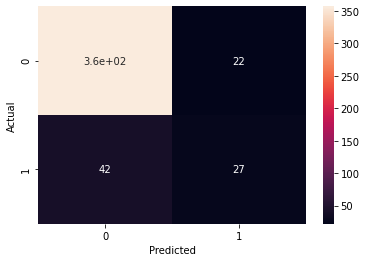

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  80.580357  34.482759  28.985507  31.496063   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.383929  60.526316  33.333333  42.990654   
5      Gradient Boosting  82.366071  44.897959  63.768116  52.694611   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  75.892857  35.114504  66.666667  46.000000   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.707375  
2       7.169994  
3       9.560006  
4       4.702851  
5       6.090640  
6       7.401286  
7       8.326464  
8       4.934148  
9       4.934150 

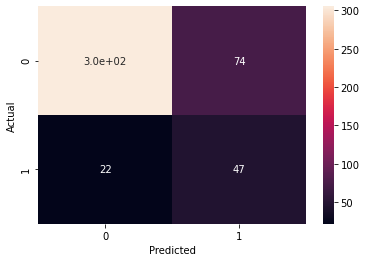

Decision Tree


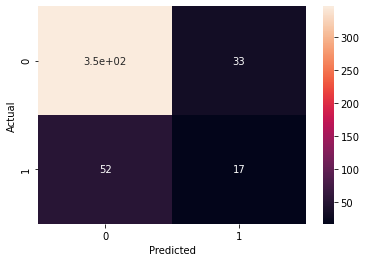

Neighbors for knn: 3
KNN


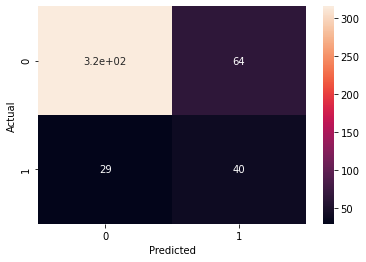

Naive Bayes


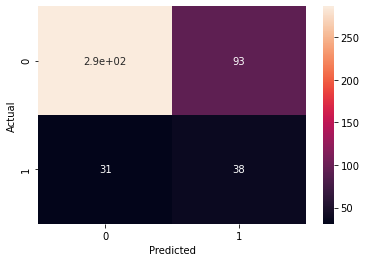

Random Forest


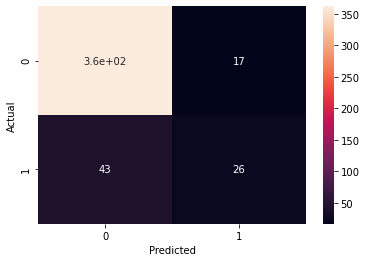

Gradient Boosting


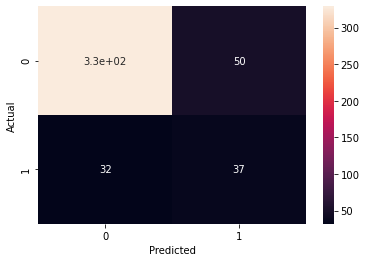

Ada Boost


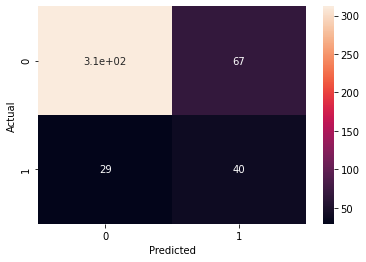

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


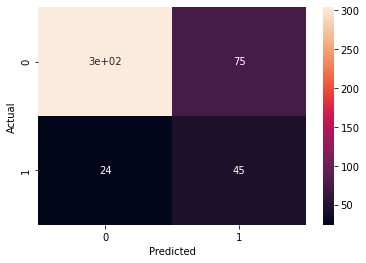

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:01:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


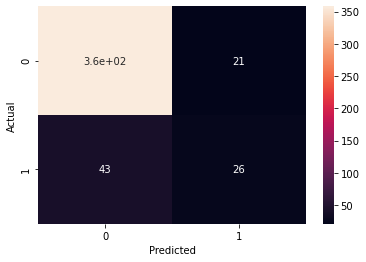

Light GBM


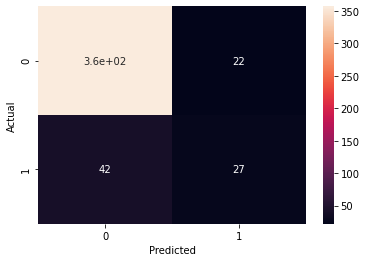

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  81.026786  34.000000  24.637681  28.571429   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.607143  60.465116  37.681159  46.428571   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  77.901786  37.500000  65.217391  47.619048   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.553175  
2       7.169994  
3       9.560006  
4       4.625759  
5       6.321919  
6       7.401286  
7       7.632587  
8       4.934148  
9       4.934150 

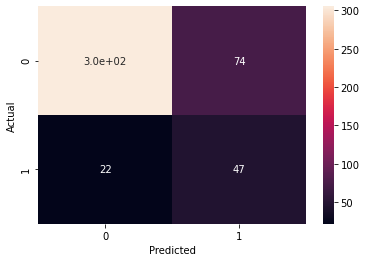

Decision Tree


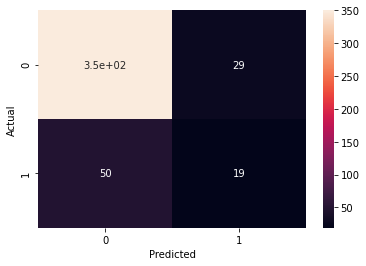

Neighbors for knn: 3
KNN


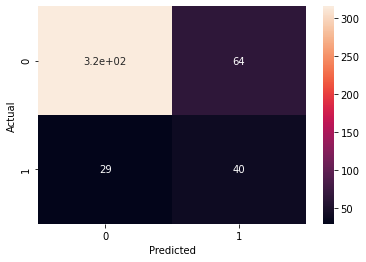

Naive Bayes


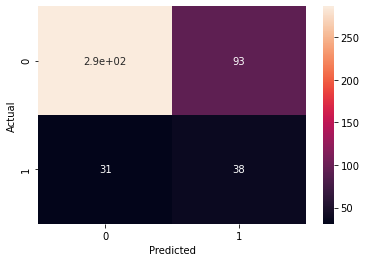

Random Forest


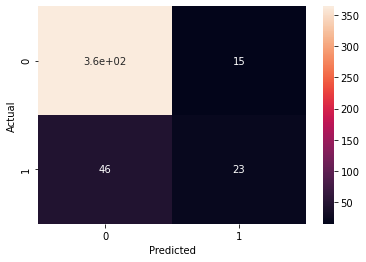

Gradient Boosting


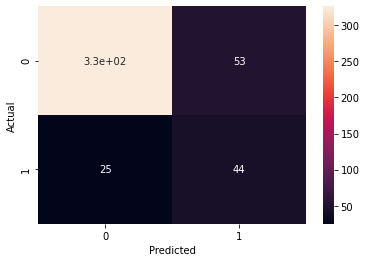

Ada Boost


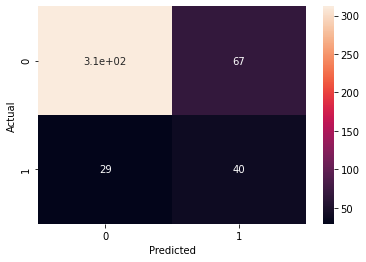

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


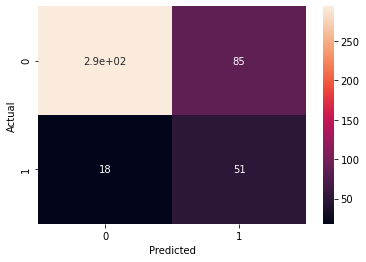

[02:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



XG Boost


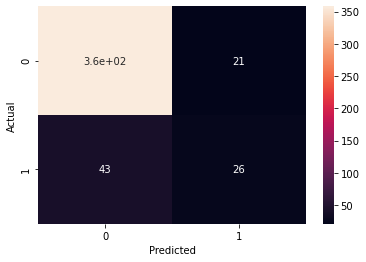

Light GBM


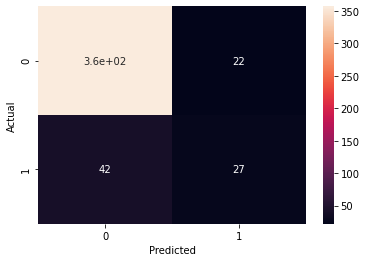

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  82.366071  39.583333  27.536232  32.478632   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.383929  60.526316  33.333333  42.990654   
5      Gradient Boosting  82.589286  45.360825  63.768116  53.012048   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  77.008929  37.500000  73.913043  49.756098   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.090595  
2       7.169994  
3       9.560006  
4       4.702851  
5       6.013542  
6       7.401286  
7       7.940986  
8       4.934148  
9       4.934150 

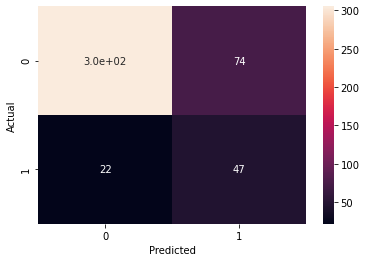

Decision Tree


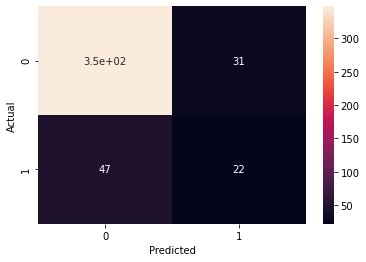

Neighbors for knn: 3
KNN


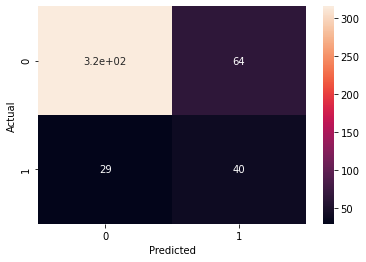

Naive Bayes


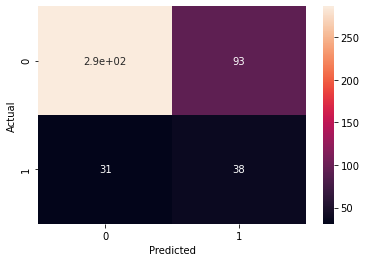

Random Forest


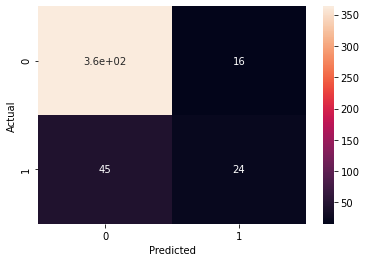

Gradient Boosting


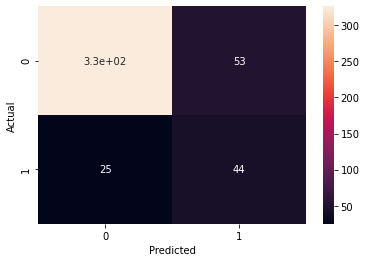

Ada Boost


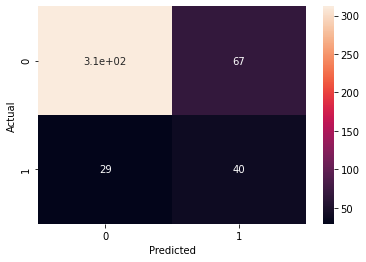

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


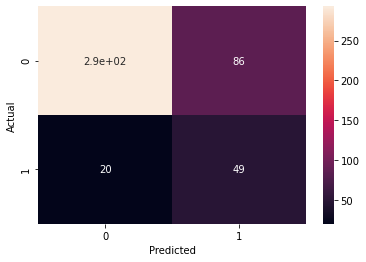

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


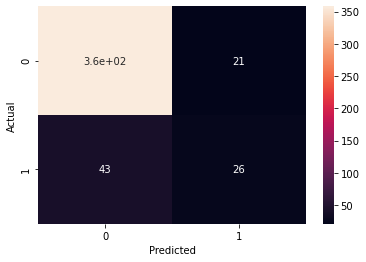

Light GBM


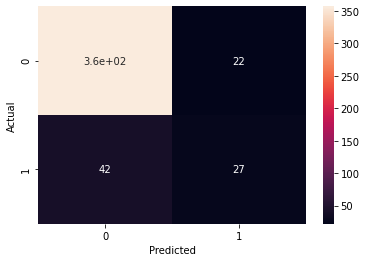

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  82.589286  41.509434  31.884058  36.065574   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.383929  60.000000  34.782609  44.036697   
5      Gradient Boosting  82.589286  45.360825  63.768116  53.012048   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  76.339286  36.296296  71.014493  48.039216   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.013503  
2       7.169994  
3       9.560006  
4       4.702853  
5       6.013542  
6       7.401286  
7       8.172275  
8       4.934148  
9       4.934150 

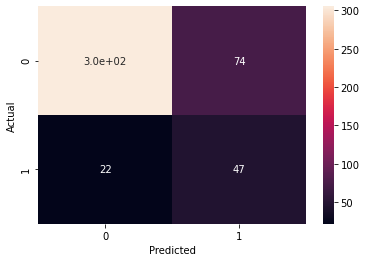

Decision Tree


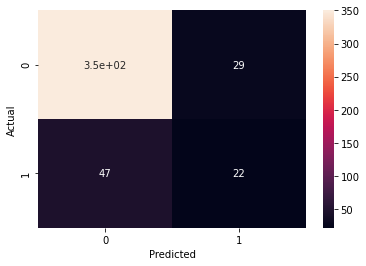

Neighbors for knn: 3
KNN


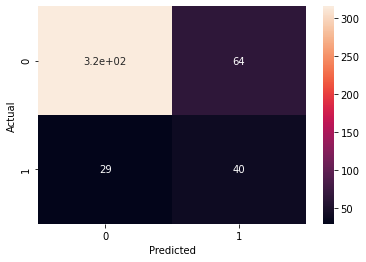

Naive Bayes


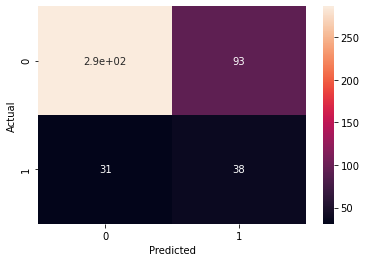

Random Forest


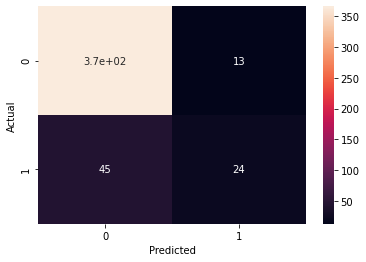

Gradient Boosting


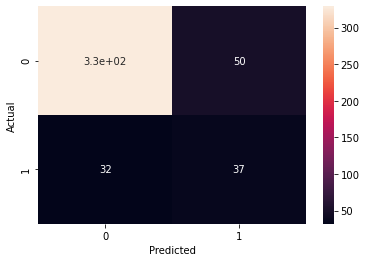

Ada Boost


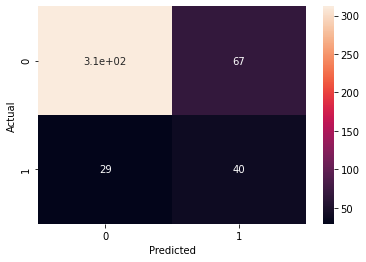

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


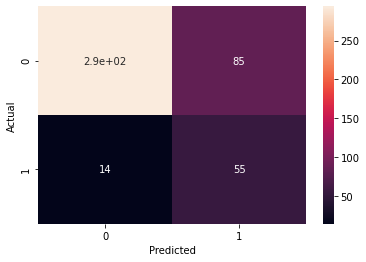

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


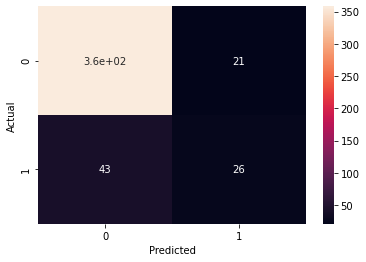

Light GBM


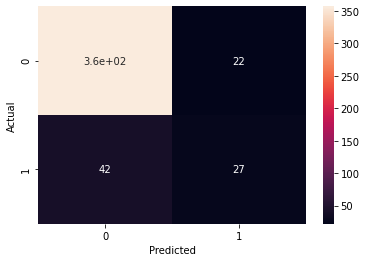

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  83.035714  43.137255  31.884058  36.666667   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  87.053571  64.864865  34.782609  45.283019   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  77.901786  39.285714  79.710145  52.631579   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       5.859308  
2       7.169994  
3       9.560006  
4       4.471561  
5       6.321919  
6       7.401286  
7       7.632605  
8       4.934148  
9       4.934150 

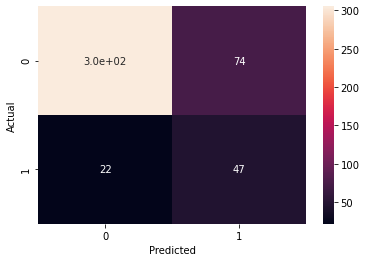

Decision Tree


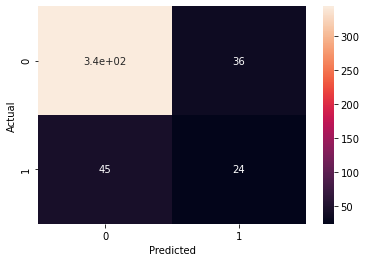

Neighbors for knn: 3
KNN


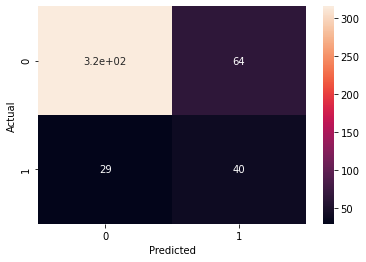

Naive Bayes


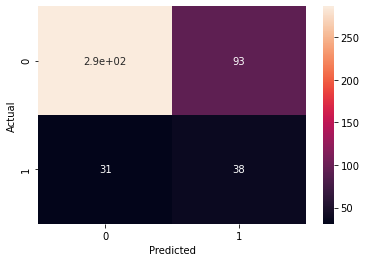

Random Forest


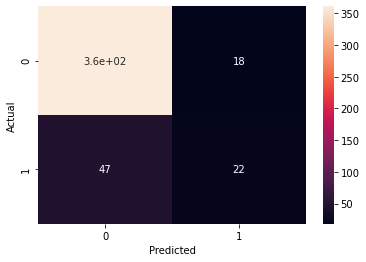

Gradient Boosting


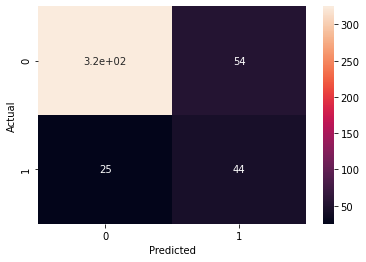

Ada Boost


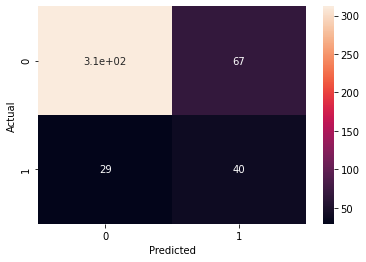

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


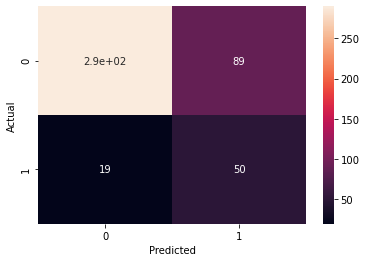

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


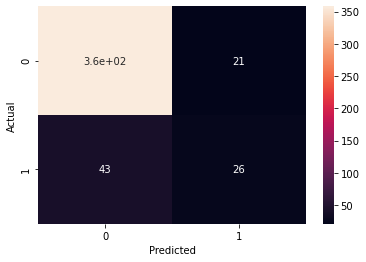

Light GBM


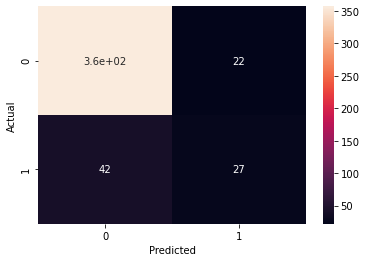

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  81.919643  40.000000  34.782609  37.209302   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  85.491071  55.000000  31.884058  40.366972   
5      Gradient Boosting  82.366071  44.897959  63.768116  52.694611   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  75.892857  35.971223  72.463768  48.076923   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.244798  
2       7.169994  
3       9.560006  
4       5.011239  
5       6.090640  
6       7.401286  
7       8.326471  
8       4.934148  
9       4.934150 

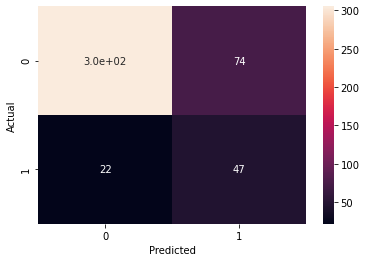

Decision Tree


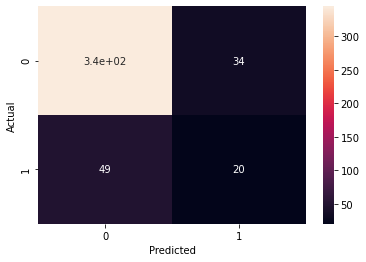

Neighbors for knn: 3
KNN


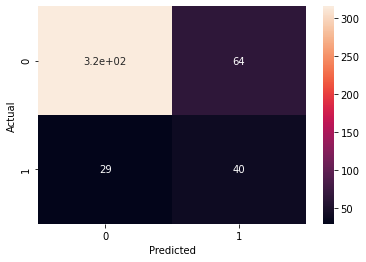

Naive Bayes


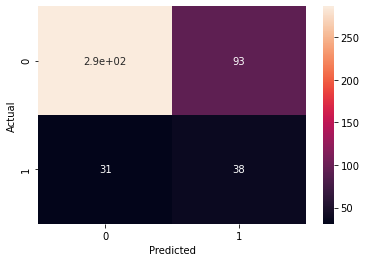

Random Forest


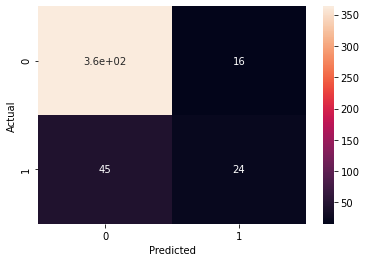

Gradient Boosting


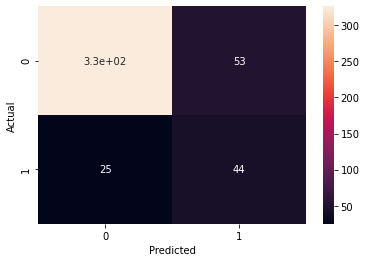

Ada Boost


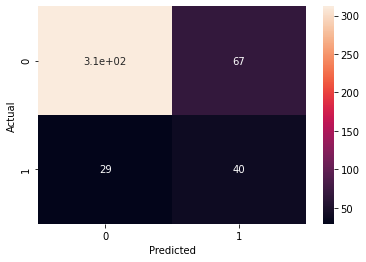

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


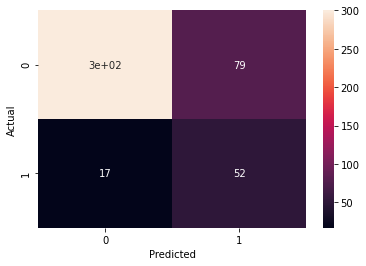

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:02:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


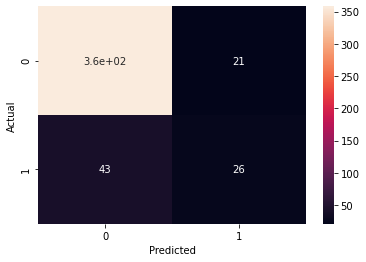

Light GBM


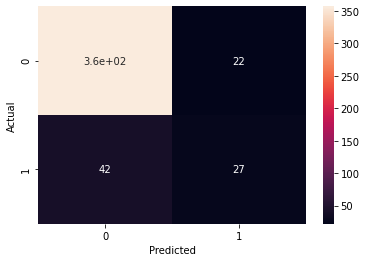

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  81.473214  37.037037  28.985507  32.520325   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.383929  60.000000  34.782609  44.036697   
5      Gradient Boosting  82.589286  45.360825  63.768116  53.012048   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  78.571429  39.694656  75.362319  52.000000   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.398986  
2       7.169994  
3       9.560006  
4       4.702853  
5       6.013542  
6       7.401286  
7       7.401307  
8       4.934148  
9       4.934150 

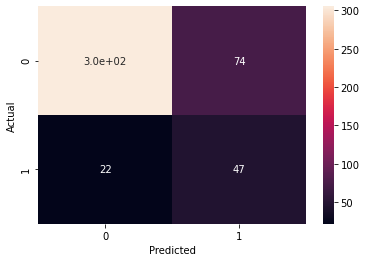

Decision Tree


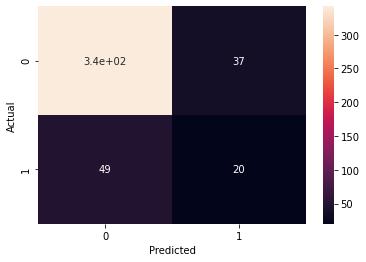

Neighbors for knn: 3
KNN


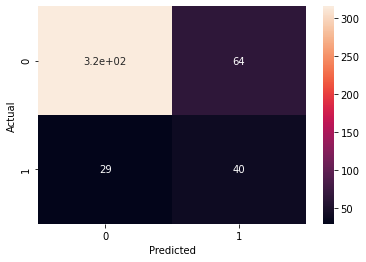

Naive Bayes


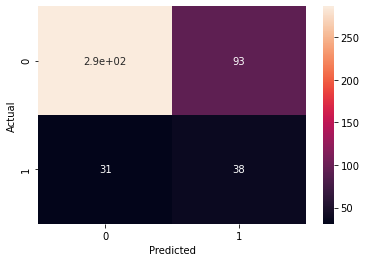

Random Forest


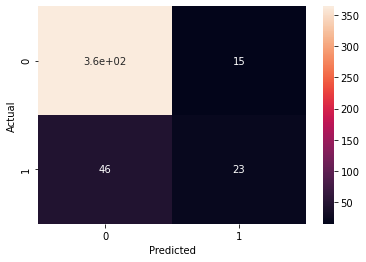

Gradient Boosting


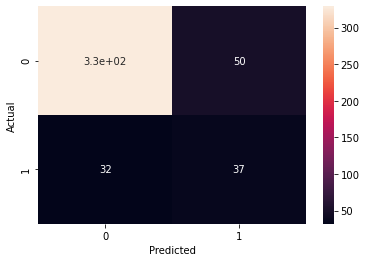

Ada Boost


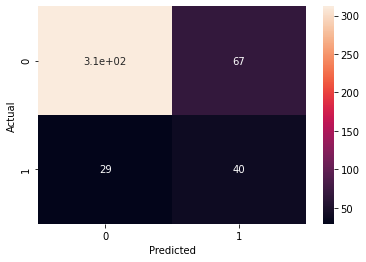

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


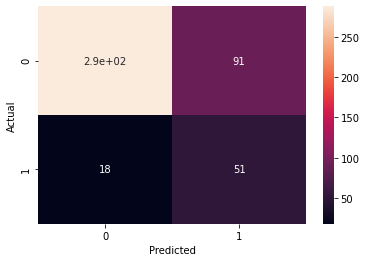

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


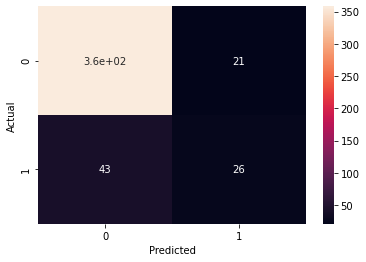

Light GBM


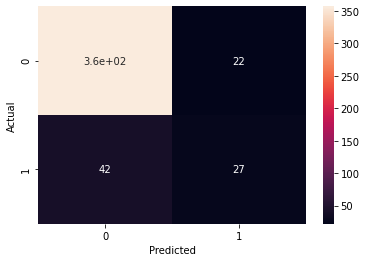

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  80.803571  35.087719  28.985507  31.746032   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.383929  60.526316  33.333333  42.990654   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  75.669643  35.915493  73.913043  48.341232   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.630278  
2       7.169994  
3       9.560006  
4       4.702851  
5       6.321919  
6       7.401286  
7       8.403570  
8       4.934148  
9       4.934150 

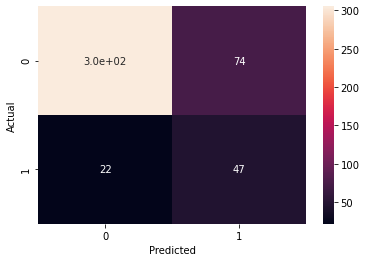

Decision Tree


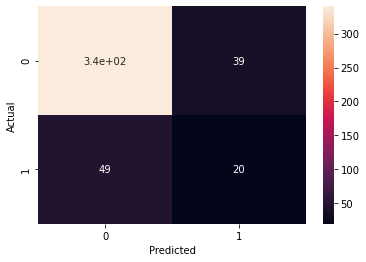

Neighbors for knn: 3
KNN


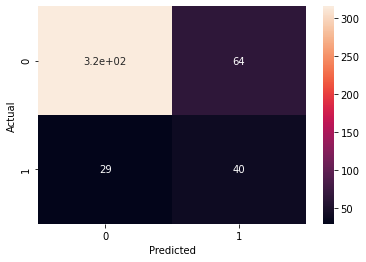

Naive Bayes


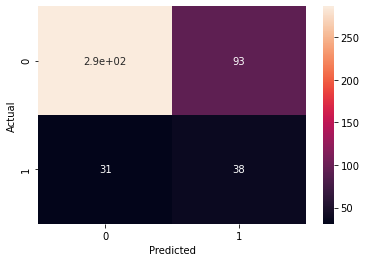

Random Forest


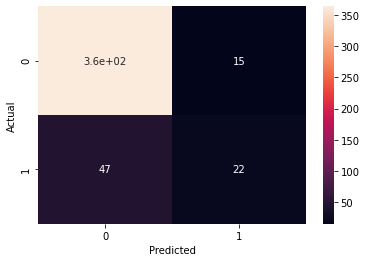

Gradient Boosting


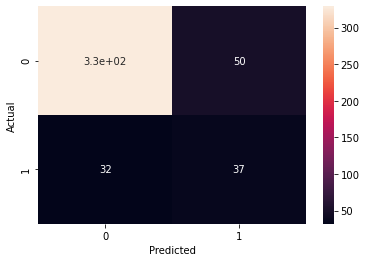

Ada Boost


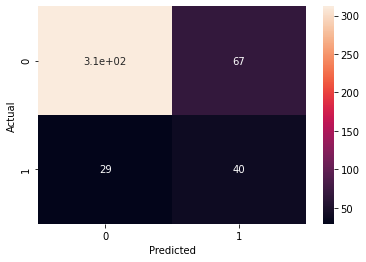

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


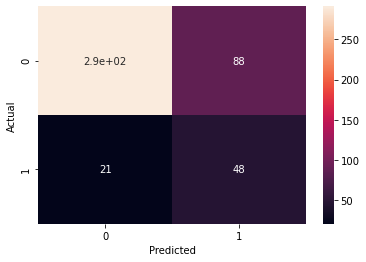

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


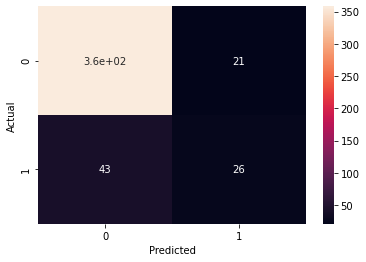

Light GBM


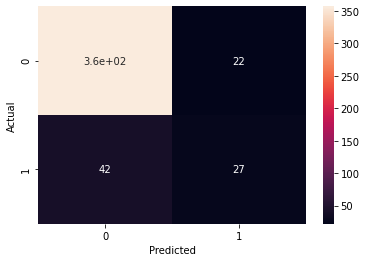

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  80.357143  33.898305  28.985507  31.250000   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.160714  59.459459  31.884058  41.509434   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  75.669643  35.294118  69.565217  46.829268   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.784472  
2       7.169994  
3       9.560006  
4       4.779947  
5       6.321919  
6       7.401286  
7       8.403565  
8       4.934148  
9       4.934150 

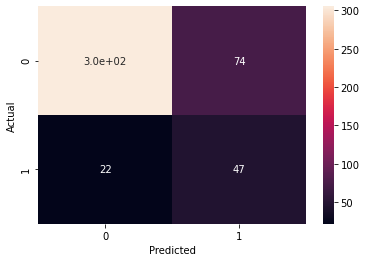

Decision Tree


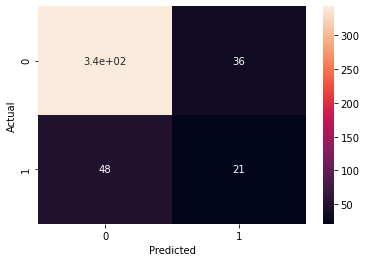

Neighbors for knn: 3
KNN


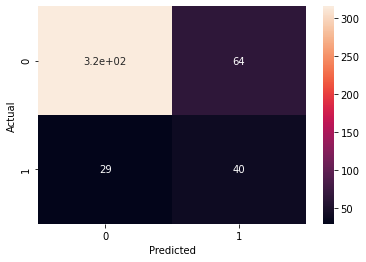

Naive Bayes


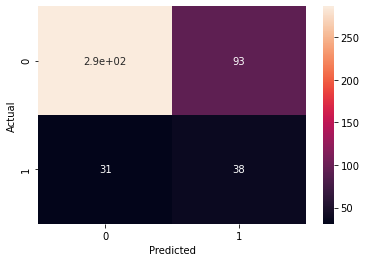

Random Forest


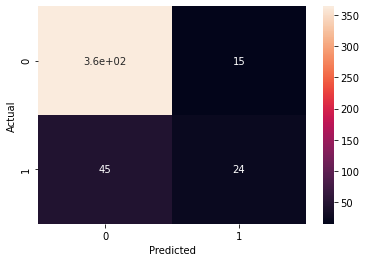

Gradient Boosting


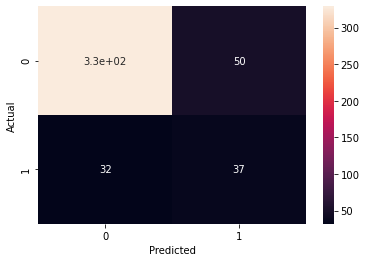

Ada Boost


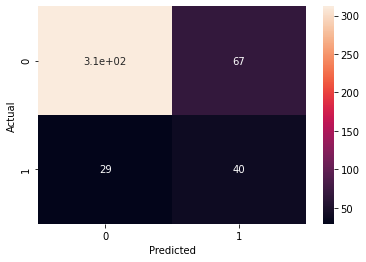

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


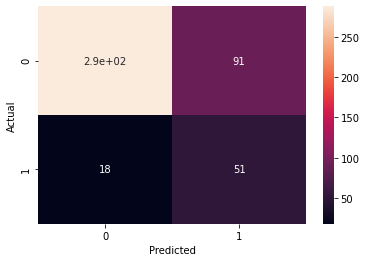

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


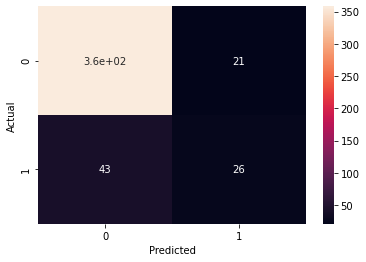

Light GBM


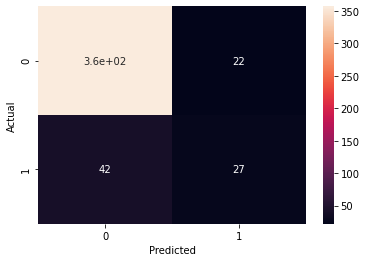

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  81.250000  36.842105  30.434783  33.333333   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.607143  61.538462  34.782609  44.444444   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  75.669643  35.915493  73.913043  48.341232   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.476085  
2       7.169994  
3       9.560006  
4       4.625756  
5       6.321919  
6       7.401286  
7       8.403570  
8       4.934148  
9       4.934150 

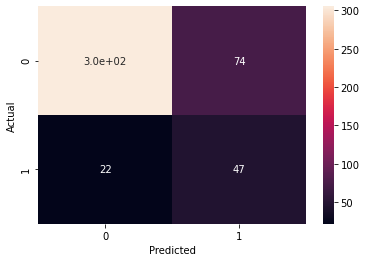

Decision Tree


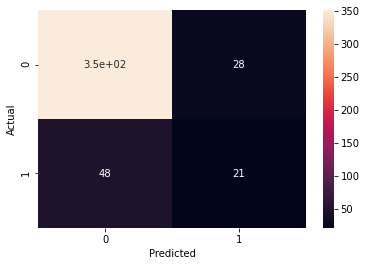

Neighbors for knn: 3
KNN


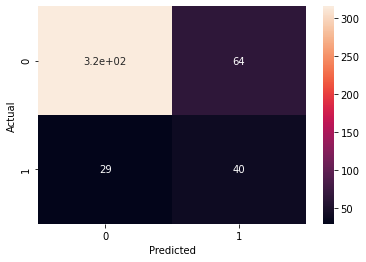

Naive Bayes


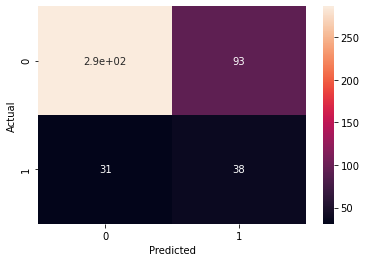

Random Forest


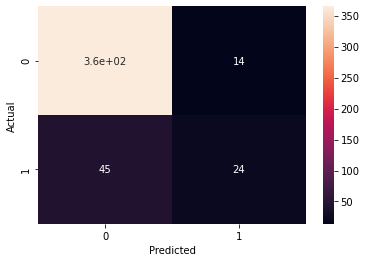

Gradient Boosting


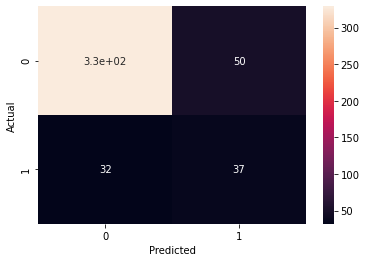

Ada Boost


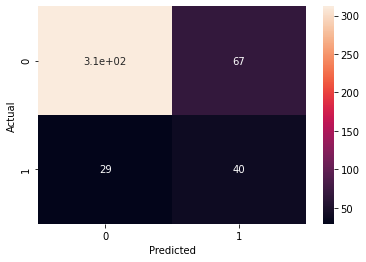

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multilayer Perceptron


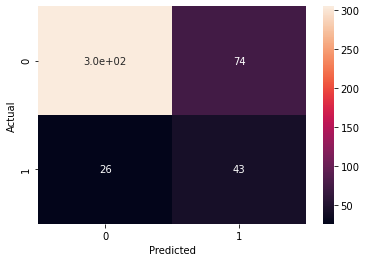

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:03:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


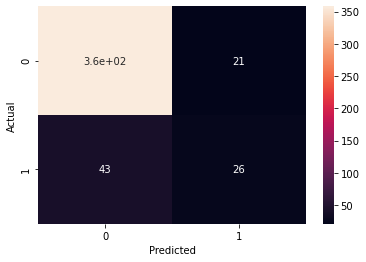

Light GBM


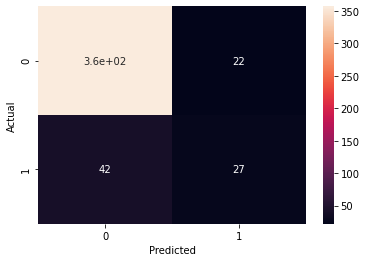

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  83.035714  42.857143  30.434783  35.593220   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.830357  63.157895  34.782609  44.859813   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  77.678571  36.752137  62.318841  46.236559   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       5.859307  
2       7.169994  
3       9.560006  
4       4.548658  
5       6.321919  
6       7.401286  
7       7.709680  
8       4.934148  
9       4.934150 

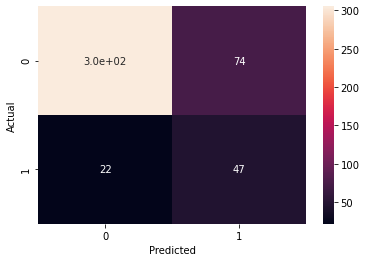

Decision Tree


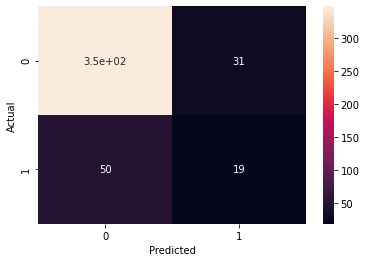

Neighbors for knn: 3
KNN


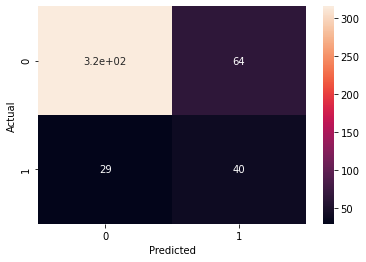

Naive Bayes


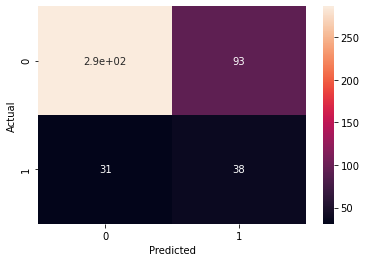

Random Forest


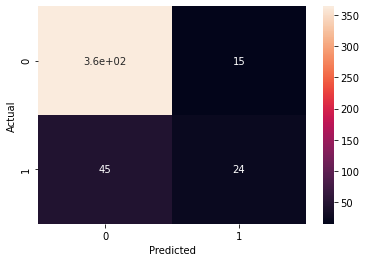

Gradient Boosting


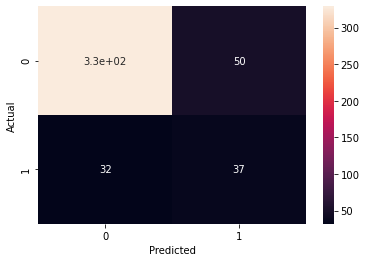

Ada Boost


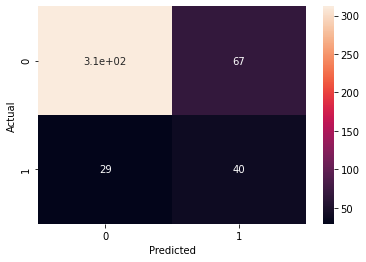

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


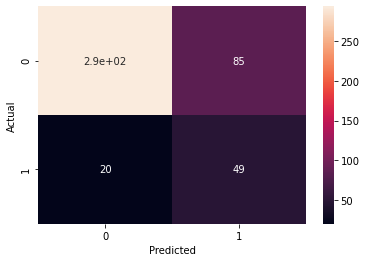

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


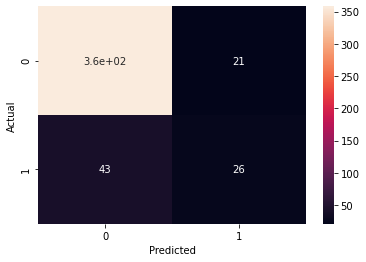

Light GBM


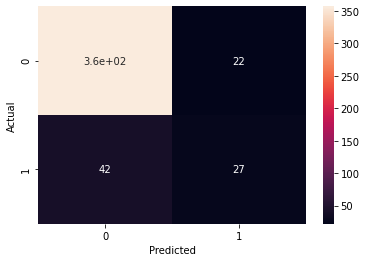

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  78.571429  38.842975  68.115942  49.473684   
1          Decision Tree  81.919643  38.000000  27.536232  31.932773   
2                    KNN  79.241071  38.461538  57.971014  46.242775   
3            Naive Bayes  72.321429  29.007634  55.072464  38.000000   
4          Random Forest  86.607143  61.538462  34.782609  44.444444   
5      Gradient Boosting  81.696429  42.528736  53.623188  47.435897   
6              Ada Boost  78.571429  37.383178  57.971014  45.454545   
7  Multilayer Perceptron  76.562500  36.567164  71.014493  48.275862   
8               XG Boost  85.714286  55.319149  37.681159  44.827586   
9              Light GBM  85.714286  55.102041  39.130435  45.762712   

   Logistic loss  
0       7.401298  
1       6.244789  
2       7.169994  
3       9.560006  
4       4.625756  
5       6.321919  
6       7.401286  
7       8.095177  
8       4.934148  
9       4.934150 

In [73]:
# trying out different combinations of trees and threshold level for random forest feature selection results
for trees in (3,5,10):
    for th in (1,2,3,4):
        print('for tree = ',trees,'and threshold = ',th)
        tm.ml_rffs(df1, 3, 'Response',3)

Across different combinations of trees and thresholds, gradient boosting has performed better. It dominates logistic regression which was performing well with full featured dataset. 

Now we'll apply LDA for dimensionality reduction and see if it dominates feature selection.

LDA takes into account the class distribution when compressing the features. Since there are only 2 classes as shown above, we only require 1 linear discriminant to make seperation between classes. The LDA algorithm won't allow more than 1 linear discriminant in this case. 

In [82]:
lda=LinearDiscriminantAnalysis(n_components=1)
lda.fit(P,L)
x=lda.transform(P)

x=pd.DataFrame(x)
x=x.rename(columns={0:'LD1'})
x

LD1
0     1.288557
1    -0.991892
2    -0.500641
3    -0.606275
4    -0.691841
...        ...
2235 -0.062878
2236  0.735353
2237 -1.452337
2238 -0.565531
2239  0.588838

[2240 rows x 1 columns]

In [78]:
x['Response']=df1['Response']

In [79]:
x

LD1  Response
0     1.288557         1
1    -0.991892         0
2    -0.500641         0
3    -0.606275         0
4    -0.691841         0
...        ...       ...
2235 -0.062878         0
2236  0.735353         0
2237 -1.452337         0
2238 -0.565531         0
2239  0.588838         1

[2240 rows x 2 columns]

Do you want to oversample your training data? (0/1): 1
What do you want your test size to be? 0.2
Logistic Regression


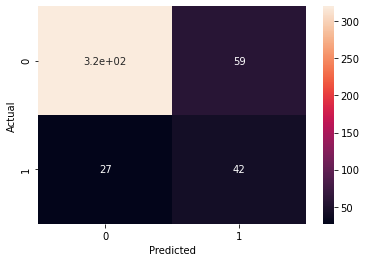

Decision Tree


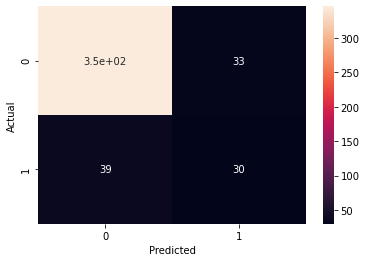

Neighbors for knn: 3
KNN


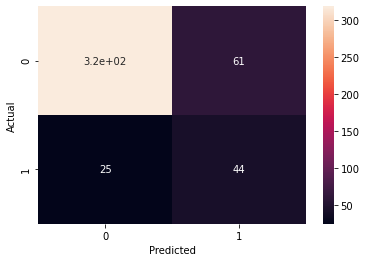

Naive Bayes


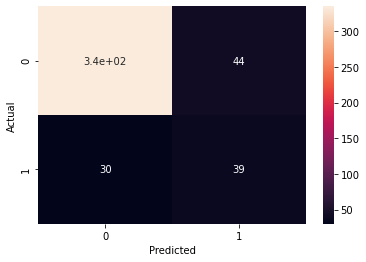

Random Forest


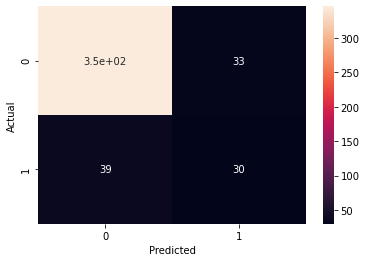

Gradient Boosting


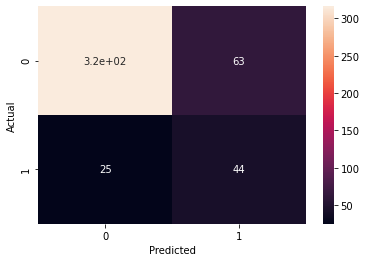

Ada Boost


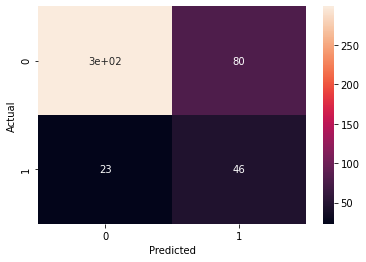

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


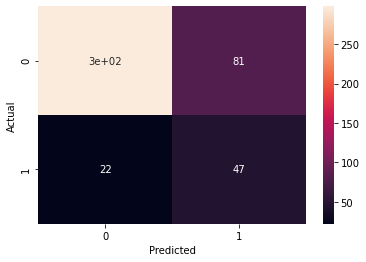

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


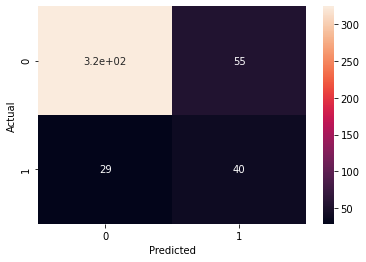

Light GBM


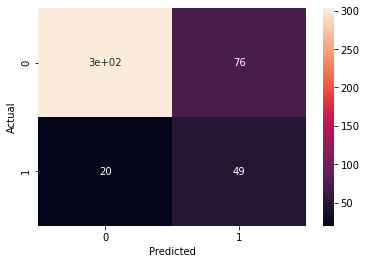

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  80.803571  41.584158  60.869565  49.411765   
1          Decision Tree  83.928571  47.619048  43.478261  45.454545   
2                    KNN  80.803571  41.904762  63.768116  50.574713   
3            Naive Bayes  83.482143  46.987952  56.521739  51.315789   
4          Random Forest  83.928571  47.619048  43.478261  45.454545   
5      Gradient Boosting  80.357143  41.121495  63.768116  50.000000   
6              Ada Boost  77.008929  36.507937  66.666667  47.179487   
7  Multilayer Perceptron  77.008929  36.718750  68.115942  47.715736   
8               XG Boost  81.250000  42.105263  57.971014  48.780488   
9              Light GBM  78.571429  39.200000  71.014493  50.515464   

   Logistic loss  
0       6.630317  
1       5.550934  
2       6.630320  
3       5.705144  
4       5.550934  
5       6.784515  
6       7.940978  
7       7.940979  
8       6.476119  
9       7.401302 

In [80]:
tm.ml(x,'Response')

Do you want to oversample your training data? (0/1): 1
What do you want your test size to be? 0.2
Logistic Regression


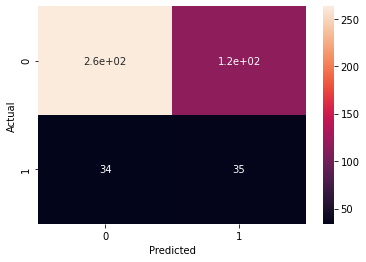

Decision Tree


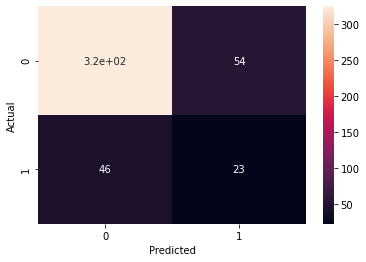

Neighbors for knn: 3
KNN


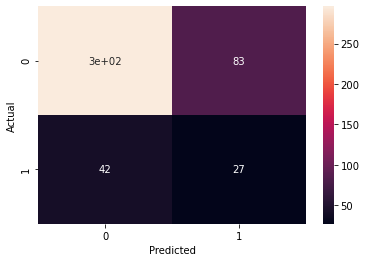

Naive Bayes


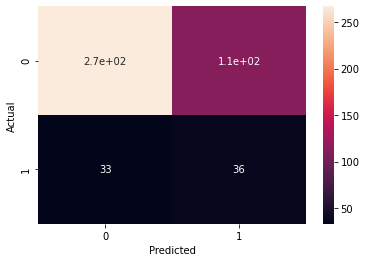

Random Forest


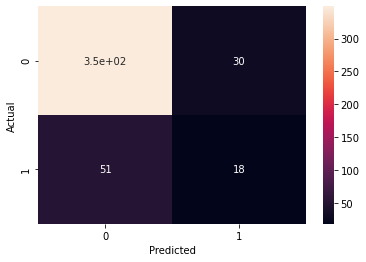

Gradient Boosting


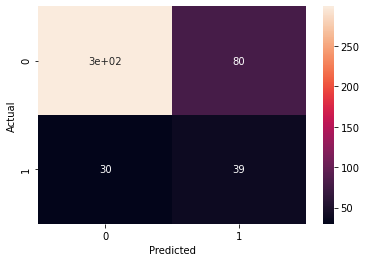

Ada Boost


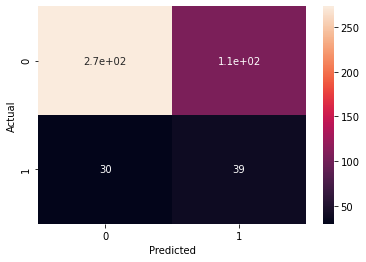

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


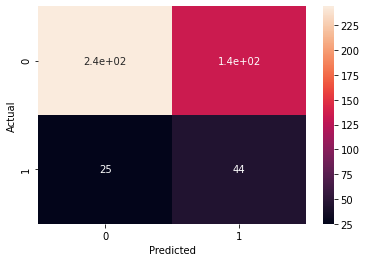

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


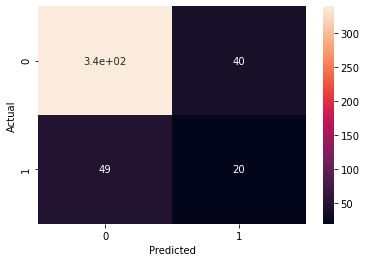

Light GBM


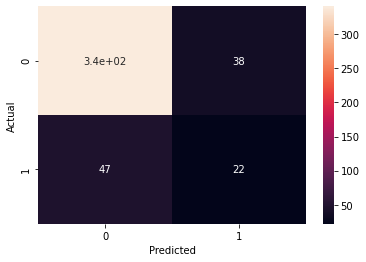

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  66.517857  23.178808  50.724638  31.818182   
1          Decision Tree  77.678571  29.870130  33.333333  31.506849   
2                    KNN  72.098214  24.545455  39.130435  30.167598   
3            Naive Bayes  67.633929  24.324324  52.173913  33.179724   
4          Random Forest  81.919643  37.500000  26.086957  30.769231   
5      Gradient Boosting  75.446429  32.773109  56.521739  41.489362   
6              Ada Boost  69.642857  26.896552  56.521739  36.448598   
7  Multilayer Perceptron  64.285714  24.581006  63.768116  35.483871   
8               XG Boost  80.133929  33.333333  28.985507  31.007752   
9              Light GBM  81.026786  36.666667  31.884058  34.108527   

   Logistic loss  
0      11.564529  
1       7.709645  
2       9.637084  
3      11.179045  
4       6.244788  
5       8.480646  
6      10.485175  
7      12.335518  
8       6.861569  
9       6.553184 

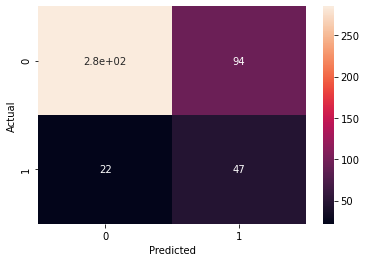

Decision Tree


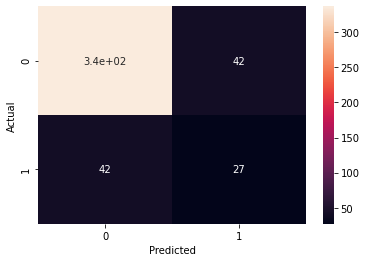

Neighbors for knn: 3
KNN


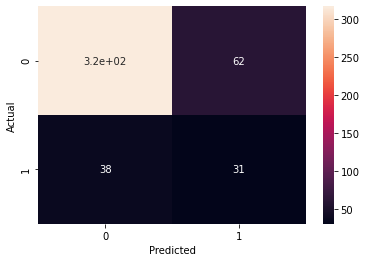

Naive Bayes


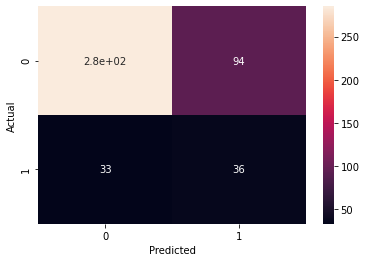

Random Forest


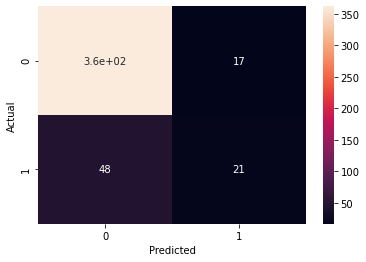

Gradient Boosting


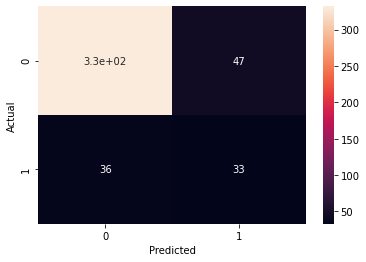

Ada Boost


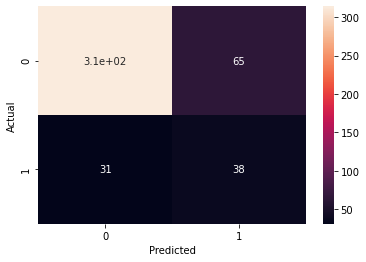

Multilayer Perceptron


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


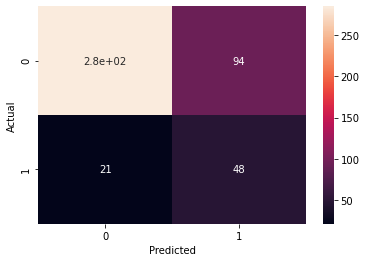

C:\Users\LENOVO\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost


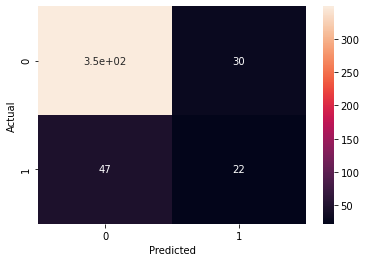

Light GBM


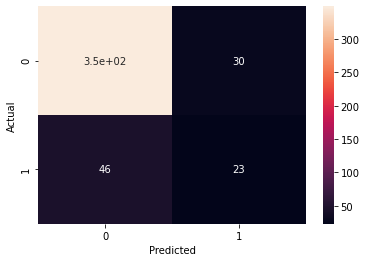

              Classifier   Accuracy  Precision     Recall   F1 score  \
0    Logistic Regression  74.107143  33.333333  68.115942  44.761905   
1          Decision Tree  81.250000  39.130435  39.130435  39.130435   
2                    KNN  77.678571  33.333333  44.927536  38.271605   
3            Naive Bayes  71.651786  27.692308  52.173913  36.180905   
4          Random Forest  85.491071  55.263158  30.434783  39.252336   
5      Gradient Boosting  81.473214  41.250000  47.826087  44.295302   
6              Ada Boost  78.571429  36.893204  55.072464  44.186047   
7  Multilayer Perceptron  74.330357  33.802817  69.565217  45.497630   
8               XG Boost  82.812500  42.307692  31.884058  36.363636   
9              Light GBM  83.035714  43.396226  33.333333  37.704918   

   Logistic loss  
0       8.943244  
1       6.476096  
2       7.709659  
3       9.791294  
4       5.011237  
5       6.399009  
6       7.401282  
7       8.866148  
8       5.936406  
9       5.859310 

In [87]:
from sklearn.decomposition import PCA
PCs=[5,10]
P=df1.drop(['Response'],axis=1)
for i in PCs:
    m=0
    columns=[]
    pca = PCA(n_components=i) 
    principalComponents = pca.fit_transform(P)
    for j in range(i):
        columns.append('pca'+str(j+1))
    principalDf = pd.DataFrame(data = principalComponents , columns = columns)
    principalDf['Response']=df1['Response']
    tm.ml(principalDf,'Response')

PCA gave the worst possible results up till now. This is mainly because this is a supervised learning case and PCA is more suitable for unsupervised learning case. PCA focused on compressing the variance as a whole without taking into account the class distribution. In contrast, LDA provided better results.

# MCMC

In [58]:

import pymc3 as pm
import arviz as az

In [67]:
df1.to_csv('C://Users//LENOVO//OneDrive//IBA//2nd semester//ML2//Project//df1_encoded.csv')

In [59]:
df1.head()

Year_Birth Education  Marital_Status   Income  Kidhome  Teenhome  \
0      1957.0         2               4  58138.0        0         0   
1      1954.0         2               4  46344.0        1         1   
2      1965.0         2               5  71613.0        0         0   
3      1984.0         2               5  26646.0        1         0   
4      1981.0         4               3  58293.0        1         0   

   Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0            2       58       635         88  ...                  7   
1           20       38        11          1  ...                  5   
2           13       26       426         49  ...                  4   
3           19       26        11          4  ...                  6   
4           18       94       173         43  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0  

[5 rows x 28 columns]

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning

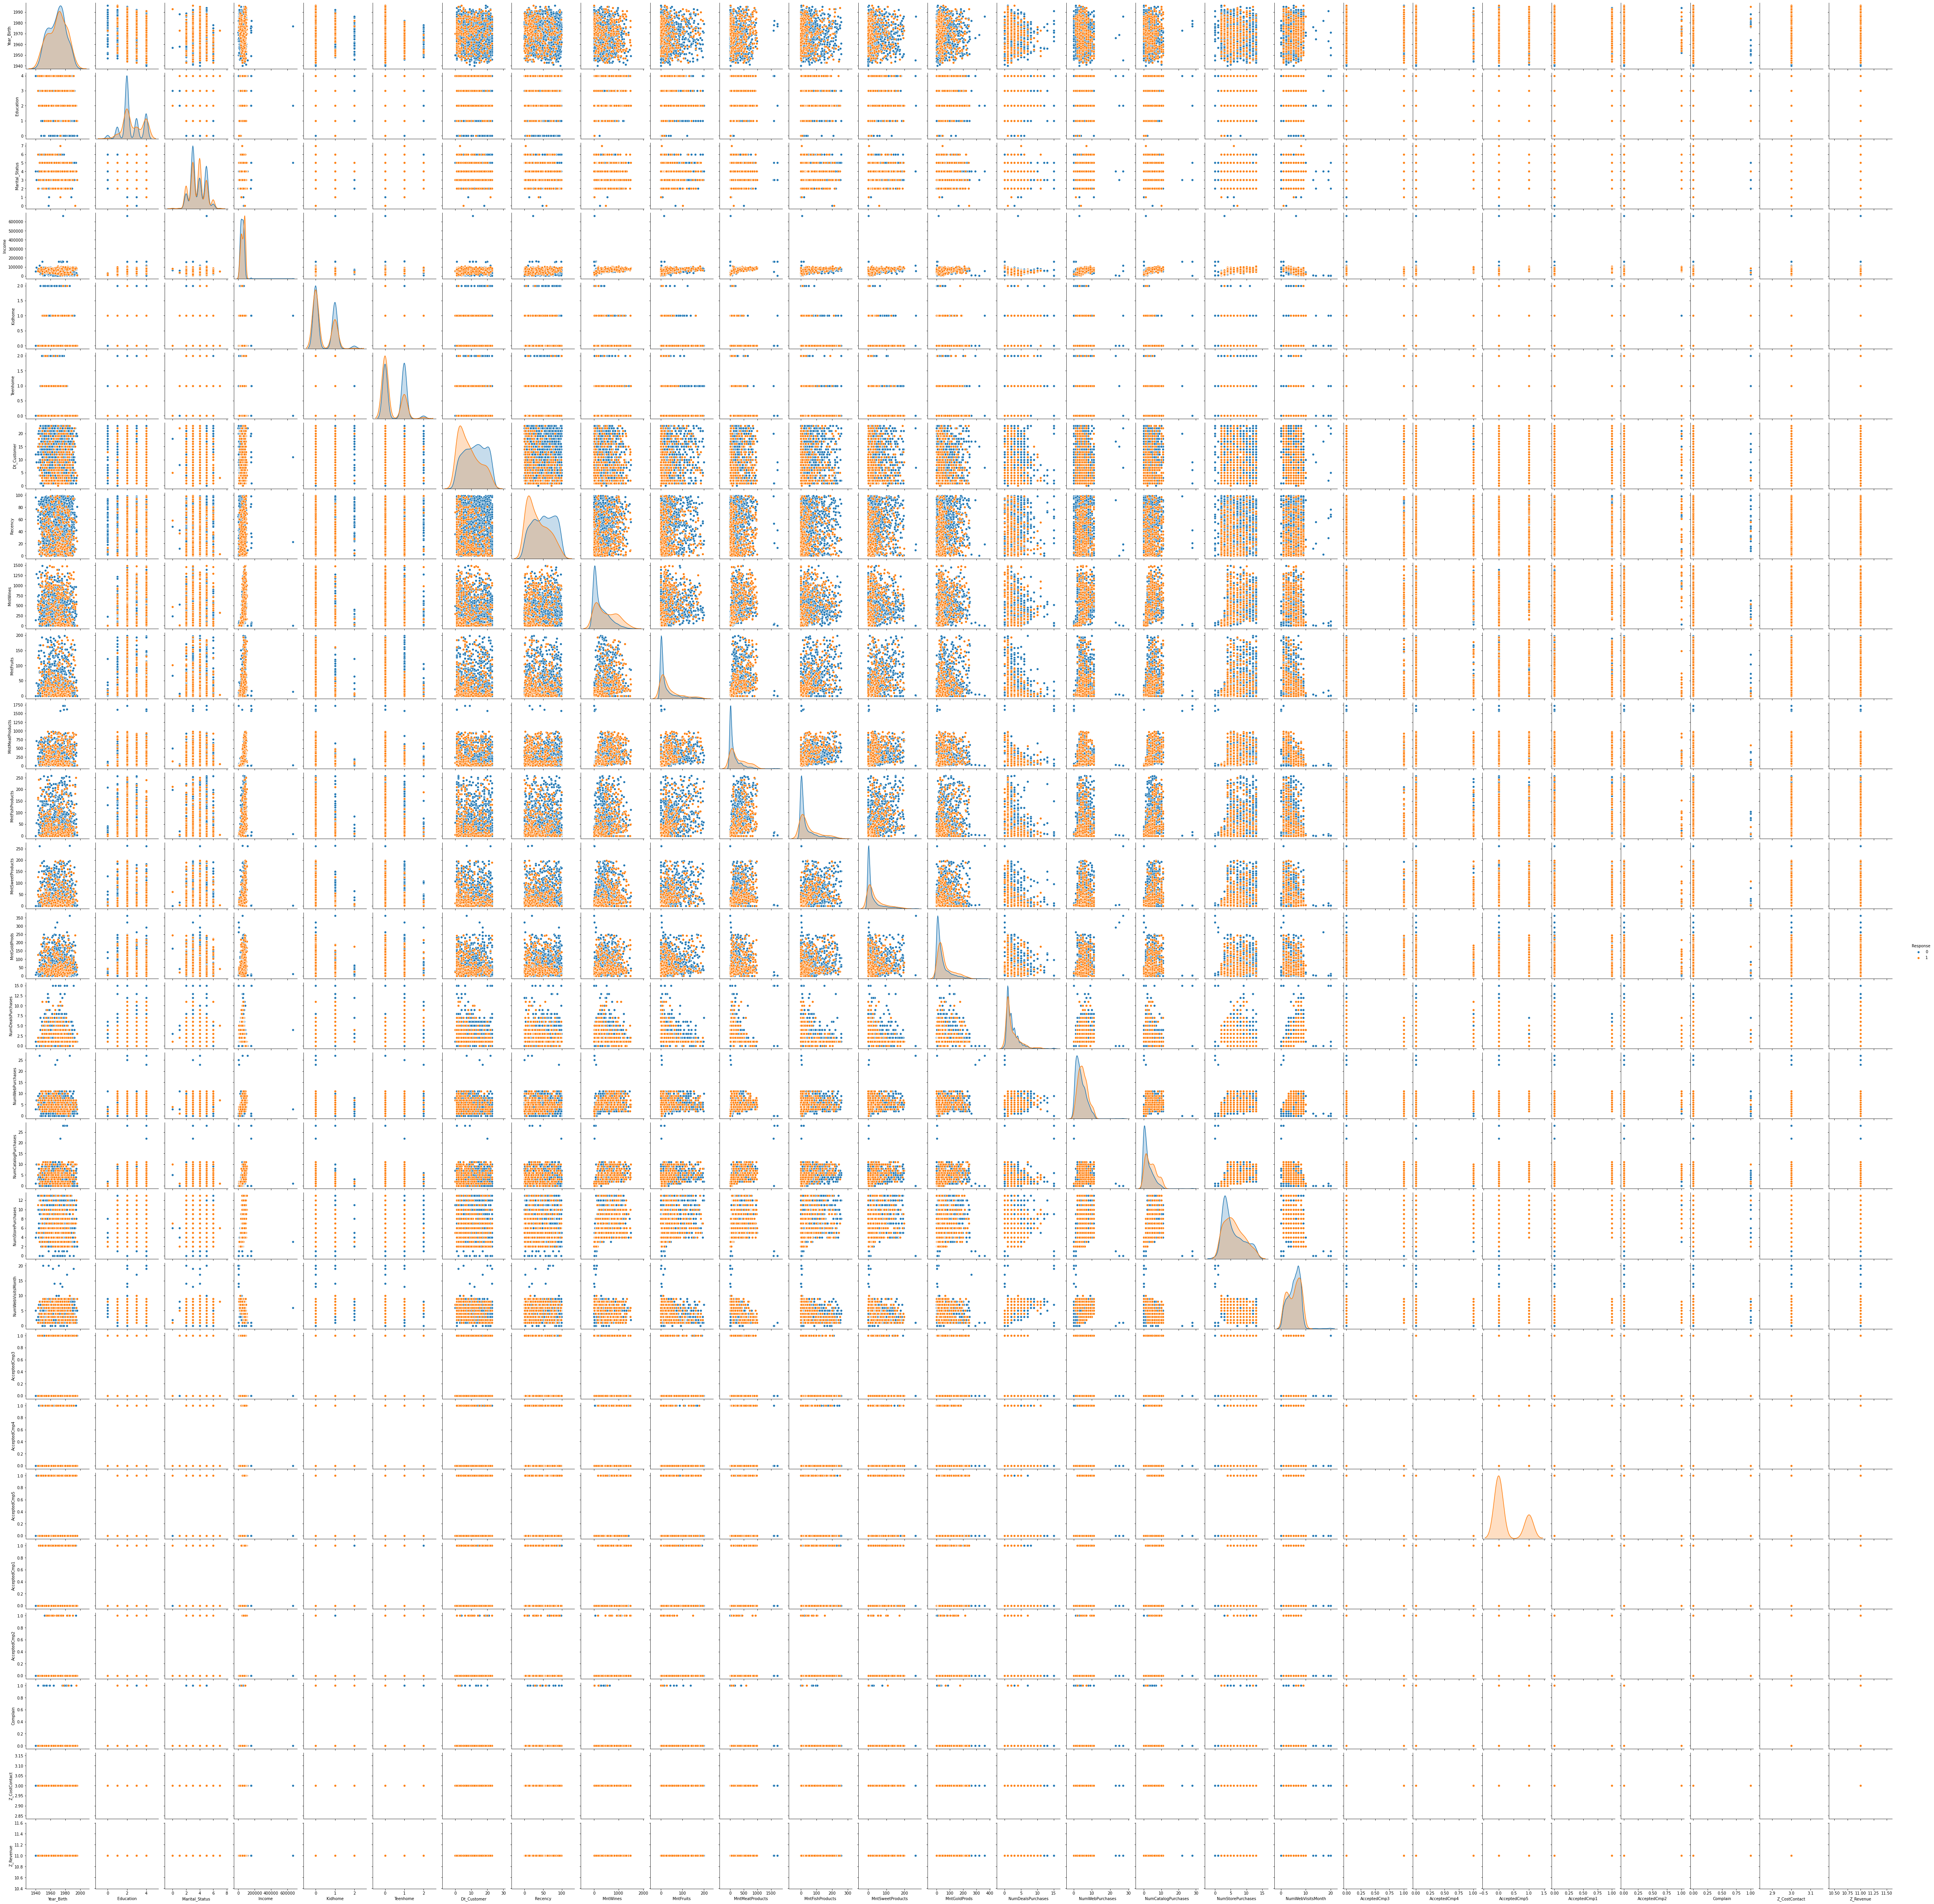

In [91]:
sns.pairplot(df1, hue='Response', diag_kind='kde')

In [60]:
y_0 = pd.Categorical(df1['Response']).codes
x_n = 'Income'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [64]:
x_c_train, x_c_test, y_0_train, y_0_test=train_test_split(x_c,y_0,test_size=0.2)

In [65]:
with pm.Model() as model_0:
    x_c_train = pm.Data('x', x_c_train)
    y_0_train = pm.Data('y', y_0_train)
    
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c_train, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0_train)
    trace_0 = pm.sample(1000)

<ipython-input-65-384256fc21a4>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_0 = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [β, α]


ValueError: Not enough samples to build a trace.

MCMC part was done on google colab since jupyter was taking too long to converge. Google colab file is seperately added.

In [ ]:
theta = trace_0['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_0['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02),
 marker='.', color=[f'C{x}' for x in y_0])
az.plot_hpd(x_c, trace_0['θ'], color='C2')
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))